In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

kaggle/input/kdd-cup-1999-data/training_attack_types
kaggle/input/kdd-cup-1999-data/kddcup.newtestdata_10_percent_unlabeled.gz
kaggle/input/kdd-cup-1999-data/kddcup.names
kaggle/input/kdd-cup-1999-data/corrected.gz
kaggle/input/kdd-cup-1999-data/typo-correction.txt
kaggle/input/kdd-cup-1999-data/kddcup.testdata.unlabeled.gz
kaggle/input/kdd-cup-1999-data/kddcup.data.corrected
kaggle/input/kdd-cup-1999-data/kddcup.testdata.unlabeled_10_percent.gz
kaggle/input/kdd-cup-1999-data/kddcup.data_10_percent_corrected
kaggle/input/kdd-cup-1999-data/kddcup.data_10_percent.gz
kaggle/input/kdd-cup-1999-data/kddcup.data.gz
kaggle/input/kdd-cup-1999-data/kddcup.data_10_percent/kddcup.data_10_percent
kaggle/input/kdd-cup-1999-data/kddcup.newtestdata_10_percent_unlabeled/kddcup.newtestdata_10_percent_unlabeled
kaggle/input/kdd-cup-1999-data/kddcup.data/kddcup.data
kaggle/input/kdd-cup-1999-data/kddcup.testdata.unlabeled/kddcup.testdata.unlabeled
kaggle/input/kdd-cup-1999-data/corrected/corrected
kaggle

# NSL-KDD

In [6]:
## NSL-KDD
train_data = pd.read_csv('kaggle/input/nslkdd/KDDTrain+.txt', header=None)
test_data = pd.read_csv('kaggle/input/nslkdd/KDDTest+.txt', header=None)

In [7]:
columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
           'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
           'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
           'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
           'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
           'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
           'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
           'dst_host_srv_rerror_rate', 'attack', 'level']

train_data.columns = columns
test_data.columns = columns

In [8]:
full_data = pd.concat([train_data, test_data], ignore_index=True)

nsl_kdd_data = full_data

In [9]:
nsl_kdd_data

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0              0           tcp  ftp_data   SF        491          0     0   
1              0           udp     other   SF        146          0     0   
2              0           tcp   private   S0          0          0     0   
3              0           tcp      http   SF        232       8153     0   
4              0           tcp      http   SF        199        420     0   
...          ...           ...       ...  ...        ...        ...   ...   
148512         0           tcp      smtp   SF        794        333     0   
148513         0           tcp      http   SF        317        938     0   
148514         0           tcp      http   SF      54540       8314     0   
148515         0           udp  domain_u   SF         42         42     0   
148516         0           tcp    sunrpc  REJ          0          0     0   

        wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0                    0       0    0  ...                    0.17   
1                    0       0    0  ...                    0.00   
2                    0       0    0  ...                    0.10   
3                    0       0    0  ...                    1.00   
4                    0       0    0  ...                    1.00   
...                ...     ...  ...  ...                     ...   
148512               0       0    0  ...                    0.72   
148513               0       0    0  ...                    1.00   
148514               0       0    2  ...                    1.00   
148515               0       0    0  ...                    0.99   
148516               0       0    0  ...                    0.08   

        dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                         0.03                         0.17   
1                         0.60                         0.88   
2                         0.05                         0.00   
3                         0.00                         0.03   
4                         0.00                         0.00   
...                        ...                          ...   
148512                    0.06                         0.01   
148513                    0.00                         0.01   
148514                    0.00                         0.00   
148515                    0.01                         0.00   
148516                    0.03                         0.00   

        dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                              0.00                  0.00   
1                              0.00                  0.00   
2                              0.00                  1.00   
3                              0.04                  0.03   
4                              0.00                  0.00   
...                             ...                   ...   
148512                         0.01                  0.01   
148513                         0.01                  0.01   
148514                         0.00                  0.00   
148515                         0.00                  0.00   
148516                         0.00                  0.00   

        dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                           0.00                  0.05   
1                           0.00                  0.00   
2                           1.00                  0.00   
3                           0.01                  0.00   
4                           0.00                  0.00   
...                          ...                   ...   
148512                      0.00                  0.00   
148513                      0.00                  0.00   
148514                      0.00                  0.07   
148515                      0.00                  0.00   
148516                      0.00                  0.44   

        dst_host_srv_rerror_rate   attack  level  
0                           

In [10]:
# X = full_data.drop(['attack', 'level'], axis=1)
# y = full_data['attack']

In [11]:
# Get the count of each class in the 'attack' column
class_counts = nsl_kdd_data['attack'].value_counts()

# Print the counts for each class
print("Class counts:\n", class_counts)

# Compute the total sum of all counts
total_count = class_counts.sum()
print("\nTotal count of all classes:", total_count)


Class counts:
 attack
normal             77054
neptune            45871
satan               4368
ipsweep             3740
smurf               3311
portsweep           3088
nmap                1566
back                1315
guess_passwd        1284
mscan                996
warezmaster          964
teardrop             904
warezclient          890
apache2              737
processtable         685
snmpguess            331
saint                319
mailbomb             293
pod                  242
snmpgetattack        178
httptunnel           133
buffer_overflow       50
land                  25
multihop              25
rootkit               23
named                 17
ps                    15
sendmail              14
xterm                 13
imap                  12
loadmodule            11
ftp_write             11
xlock                  9
phf                    6
perl                   5
xsnoop                 4
spy                    2
worm                   2
sqlattack              2
udp

In [12]:
nsl_kdd_data['attack'].value_counts()/len(nsl_kdd_data)

attack
normal             0.518823
neptune            0.308860
satan              0.029411
ipsweep            0.025182
smurf              0.022294
portsweep          0.020792
nmap               0.010544
back               0.008854
guess_passwd       0.008645
mscan              0.006706
warezmaster        0.006491
teardrop           0.006087
warezclient        0.005993
apache2            0.004962
processtable       0.004612
snmpguess          0.002229
saint              0.002148
mailbomb           0.001973
pod                0.001629
snmpgetattack      0.001199
httptunnel         0.000896
buffer_overflow    0.000337
land               0.000168
multihop           0.000168
rootkit            0.000155
named              0.000114
ps                 0.000101
sendmail           0.000094
xterm              0.000088
imap               0.000081
loadmodule         0.000074
ftp_write          0.000074
xlock              0.000061
phf                0.000040
perl               0.000034
xsnoop       

In [13]:
labels_dict = {"normal":0, "neptune":1} #assuming 2 - all other attacks
nsl_kdd_data['attack'] = nsl_kdd_data['attack'].apply(lambda x: labels_dict.get(x, 2)).astype(np.int32)
nsl_kdd_data['attack'].value_counts()/len(nsl_kdd_data)

attack
0    0.518823
1    0.308860
2    0.172317
Name: count, dtype: float64

In [14]:
nsl_kdd_data.drop(columns=['level'], inplace=True)

In [15]:
nsl_kdd_data['attack'].unique()

array([0, 1, 2], dtype=int32)

In [16]:
# nsl_kdd_data.drop(columns=['attack'], inplace=True)

# UNSW-NB15

In [17]:
root = "kaggle/input/unsw-nb15/"
train = pd.read_csv(root+"UNSW_NB15_training-set.csv")
test = pd.read_csv(root+"UNSW_NB15_testing-set.csv")
list_events = pd.read_csv(root+"UNSW-NB15_LIST_EVENTS.csv")
features = pd.read_csv(root+"NUSW-NB15_features.csv", encoding='cp1252')

In [18]:
# Creating a empty dict, where I will save all parameters required for test data transformation
saved_dict = {}
# Reading datasets
dfs = []
for i in range(1,5):
    path = root+'UNSW-NB15_{}.csv'  # There are 4 input csv files
    dfs.append(pd.read_csv(path.format(i), header = None))
all_data = pd.concat(dfs).reset_index(drop=True)  # Concat all to a single df
# This csv file contains names of all the features
df_col = pd.read_csv(root+'NUSW-NB15_features.csv', encoding='ISO-8859-1')
# Making column names lower case, removing spaces
df_col['Name'] = df_col['Name'].apply(lambda x: x.strip().replace(' ', '').lower())
# Renaming our dataframe with proper column names
all_data.columns = df_col['Name']
# Saving useful info, later this will be used to transform raw test data
saved_dict['columns'] = df_col['Name'][df_col['Name']!='label'].tolist()
del df_col

/tmp/ipykernel_3050762/862875548.py:7: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(path.format(i), header = None))
/tmp/ipykernel_3050762/862875548.py:7: DtypeWarning: Columns (3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(path.format(i), header = None))


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# We will remove all high corrlated features except ('sbytes', 'dbytes'), since we need them in feature engineering
todrop = ['sloss', 'dloss', 'dwin', 'ct_src_dport_ltm', 'ct_dst_src_ltm', 'ct_ftp_cmd', 'ct_srv_dst']

# removing the features from our data
all_data.drop(columns=todrop, inplace=True)
# creating new features
all_data['network_bytes'] = all_data['sbytes'] + all_data['dbytes']

# Dropping columns which are not useful for the classification
# attack_cat is for multiclass classification
all_data.drop(['attack_cat'], axis=1, inplace=True)

# Onehot Encoding
service_ = OneHotEncoder()
proto_ = OneHotEncoder()
state_ = OneHotEncoder()
ohe_service = service_.fit(all_data.service.values.reshape(-1,1))
ohe_proto = proto_.fit(all_data.proto.values.reshape(-1,1))
ohe_state = state_.fit(all_data.state.values.reshape(-1,1))

# We are onehot encoding the given column
# Remove the original categorical column
for col, ohe in zip(['proto', 'service', 'state'], [ohe_proto, ohe_service, ohe_state]):
    x = ohe.transform(all_data[col].values.reshape(-1,1))
    tmp_df = pd.DataFrame(x.todense(), columns=[col+'_'+i for i in ohe.categories_[0]])
    all_data = pd.concat([all_data.drop(col, axis=1), tmp_df], axis=1)
all_data.head()

srcip  sport          dstip dsport       dur  sbytes  dbytes  sttl  \
0  59.166.0.0   1390  149.171.126.6     53  0.001055     132     164    31   
1  59.166.0.0  33661  149.171.126.9   1024  0.036133     528     304    31   
2  59.166.0.6   1464  149.171.126.7     53  0.001119     146     178    31   
3  59.166.0.5   3593  149.171.126.5     53  0.001209     132     164    31   
4  59.166.0.3  49664  149.171.126.0     53  0.001169     146     178    31   

   dttl         sload  ...  state_INT  state_MAS  state_PAR  state_REQ  \
0    29  500473.93750  ...        0.0        0.0        0.0        0.0   
1    29   87676.08594  ...        0.0        0.0        0.0        0.0   
2    29  521894.53130  ...        0.0        0.0        0.0        0.0   
3    29  436724.56250  ...        0.0        0.0        0.0        0.0   
4    29  499572.25000  ...        0.0        0.0        0.0        0.0   

   state_RST  state_TST  state_TXD  state_URH  state_URN  state_no  
0        0.0        0.0        0.0        0.0        0.0       0.0  
1        0.0        0.0        0.0        0.0        0.0       0.0  
2        0.0        0.0        0.0        0.0        0.0       0.0  
3        0.0        0.0        0.0        0.0        0.0       0.0  
4        0.0        0.0        0.0        0.0        0.0       0.0  

[5 rows x 203 columns]

In [20]:
all_data['label']

0          0
1          0
2          0
3          0
4          0
          ..
2540042    0
2540043    0
2540044    0
2540045    0
2540046    1
Name: label, Length: 2540047, dtype: int64

In [21]:
all_data['label'].value_counts()/len(all_data)

label
0    0.873513
1    0.126487
Name: count, dtype: float64

# KDD CUP 99

In [23]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.preprocessing import MinMaxScaler
print(os.listdir('kaggle/input/kdd-cup-1999-data'))

['training_attack_types', 'kddcup.newtestdata_10_percent_unlabeled.gz', 'kddcup.data_10_percent', 'kddcup.names', 'corrected.gz', 'typo-correction.txt', 'kddcup.testdata.unlabeled.gz', 'kddcup.data.corrected', 'kddcup.testdata.unlabeled_10_percent.gz', 'kddcup.data_10_percent_corrected', 'kddcup.newtestdata_10_percent_unlabeled', 'kddcup.data_10_percent.gz', 'kddcup.data', 'kddcup.testdata.unlabeled', 'corrected', 'kddcup.data.gz', 'kddcup.testdata.unlabeled_10_percent']


In [25]:
with open("kaggle/input/kdd-cup-1999-data/kddcup.names",'r') as f:
    print(f.read())

cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
#print(columns)
print(len(columns))

attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [26]:
path = "kaggle/input/kdd-cup-1999-data/kddcup.data_10_percent.gz"
df = pd.read_csv(path,names=columns)

#Adding Attack Type column
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])

df.head()

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        181       5450     0   
1         0           tcp    http   SF        239        486     0   
2         0           tcp    http   SF        235       1337     0   
3         0           tcp    http   SF        219       1337     0   
4         0           tcp    http   SF        217       2032     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                     1.0   
1               0       0    0  ...                     1.0   
2               0       0    0  ...                     1.0   
3               0       0    0  ...                     1.0   
4               0       0    0  ...                     1.0   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                     0.0                         0.11   
1                     0.0                         0.05   
2                     0.0                         0.03   
3                     0.0                         0.03   
4                     0.0                         0.02   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                          0.0                   0.0   
1                          0.0                   0.0   
2                          0.0                   0.0   
3                          0.0                   0.0   
4                          0.0                   0.0   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                       0.0                   0.0                       0.0   
1                       0.0                   0.0                       0.0   
2                       0.0                   0.0                       0.0   
3                       0.0                   0.0                       0.0   
4                       0.0                   0.0                       0.0   

    target  Attack Type  
0  normal.       normal  
1  normal.       normal  
2  normal.       normal  
3  normal.       normal  
4  normal.       normal  

[5 rows x 43 columns]

In [27]:
df['target'].value_counts()

target
smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: count, dtype: int64

In [28]:
df['Attack Type'].value_counts()

Attack Type
dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: count, dtype: int64

In [29]:
kdd_cup_df = df

# CICD-2017

In [30]:
import pandas as pd
# df1=pd.read_csv('/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
# df2=pd.read_csv('/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
# df3=pd.read_csv('/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Morning.pcap_ISCX.csv')
# df4=pd.read_csv('/kaggle/input/network-intrusion-dataset/Monday-WorkingHours.pcap_ISCX.csv')
# df5=pd.read_csv('/kaggle/input/network-intrusion-dataset/Monday-WorkingHours.pcap_ISCX.csv')
# df6=pd.read_csv('/kaggle/input/network-intrusion-dataset/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
# df7=pd.read_csv('/kaggle/input/network-intrusion-dataset/Tuesday-WorkingHours.pcap_ISCX.csv')
cicd2017 = pd.read_csv('kaggle/input/network-intrusion-dataset/Wednesday-workingHours.pcap_ISCX.csv')

# cicd2017 = pd.concat([df1, df2, df3,df4,df5,df6,df7], ignore_index=True)

In [31]:
cicd2017[' Label'].unique()

array(['BENIGN', 'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk',
       'DoS GoldenEye', 'Heartbleed'], dtype=object)

# Utils and Pipeline Functions

In [32]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier

def preprocess_data(dataframe):
    # Ensure the input is a DataFrame
    df = pd.DataFrame(dataframe)

    # Separate numeric and categorical columns
    numeric_cols = df.select_dtypes(include=["number"]).columns
    categorical_cols = df.select_dtypes(exclude=["number"]).columns

    # # Replace infinite values with NaN
    df[numeric_cols] = df[numeric_cols].replace([np.inf, -np.inf], np.nan)

    # # Handle missing values for numeric columns
    # if not numeric_cols.empty:
    #     num_imputer = SimpleImputer(strategy="mean")
    #     df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])

    # Drop rows with missing values
    df = df.dropna(subset=numeric_cols)  # Drop rows where any numeric column has NaN
    df = df.dropna(subset=categorical_cols)  # Drop rows where any categorical column has NaN

    # Handle missing values for categorical columns (if present)
    if not categorical_cols.empty:
        # Fill missing values
        # cat_imputer = SimpleImputer(strategy="most_frequent")
        # df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

        # Convert categorical columns to strings for uniformity
        df[categorical_cols] = df[categorical_cols].astype(str)

        # Encode categorical features
        label_encoders = {}
        for col in categorical_cols:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
            label_encoders[col] = le  # Save encoder for inverse transformations

    # Return the preprocessed DataFrame and optional encoders
    return df


In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

def plot_roc_curve_multi_class(test_y, probas, class_names):
    """
    Plots a single ROC curve for multi-class classification by averaging probabilities.

    Args:
    - test_y: True labels (array-like), shape (n_samples,)
    - probas: Predicted probabilities, shape (n_samples, n_classes)
    - class_names: List of class names (or labels)
    """
    # Binarize the true labels for multi-class
    lb = label_binarize(test_y, classes=range(len(class_names)))  # shape: (n_samples, n_classes)

    # Compute ROC curve and AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(class_names)):
        fpr[i], tpr[i], _ = roc_curve(lb[:, i], probas[:, i])  # Compute for each class
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and AUC
    fpr["micro"], tpr["micro"], _ = roc_curve(lb.ravel(), probas.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Compute macro-average ROC curve and AUC
    # Aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(class_names))]))

    # Interpolate all ROC curves
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(len(class_names)):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Average and compute AUC
    mean_tpr /= len(class_names)
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=(8, 6))
    plt.plot(
        fpr["micro"], tpr["micro"],
        label=f"Micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
        color='deeppink', linestyle=':', linewidth=1,
    )

    plt.plot(
        fpr["macro"], tpr["macro"],
        label=f"Macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
        color='navy', linestyle='-', linewidth=1,
    )

    for i, class_name in enumerate(class_names):
        plt.plot(
            fpr[i], tpr[i], lw=1,
            label=f"ROC curve of class {class_name} (AUC = {roc_auc[i]:.2f})"
        )

    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multi-class ROC Curve')
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.show()

In [34]:
%pip install torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.2.0+cpu.html
%pip install torch-geometric

import torch
import pandas as pd
from sklearn.preprocessing import StandardScaler
from torch_geometric.data import Data
from torch_geometric.nn import GATConv
import torch.nn.functional as F

Looking in links: https://data.pyg.org/whl/torch-2.2.0+cpu.html
     |████████████████████████████████| 507 kB 13.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 345 kB/s eta 0:00:01
     |████████████████████████████████| 770 kB 337 kB/s eta 0:00:01
     |████████████████████████████████| 213 kB 343 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


/media/ssd/test/venv/lib/python3.8/site-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /media/ssd/test/venv/lib/python3.8/site-packages/torch_scatter/_version_cpu.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/media/ssd/test/venv/lib/python3.8/site-packages/torch_geometric/typing.py:97: UserWarning: An issue occurred while importing 'torch-cluster'. Disabling its usage. Stacktrace: /media/ssd/test/venv/lib/python3.8/site-packages/torch_cluster/_version_cpu.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warnings.warn(f"An issue occurred while importing 'torch-cluster'. "
/media/ssd/test/venv/lib/python3.8/site-packages/torch_geometric/typing.py:113: UserWarning: An issue occurred while importing 'torch-spline-conv'. Disabling its usage. Stacktrace: /media/ssd/test/venv/lib/python3.8/site-packages/torc

In [36]:
%pip install xgboost

import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.svm import SVC, OneClassSVM
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv, GATConv, GraphSAGE
from torch.optim import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import time
import tracemalloc
from torch.optim import Adam
from torch.nn import Module

from torch_geometric.nn import (
    GCNConv, GATConv, GraphSAGE, TransformerConv,
    CGConv, GINConv, PANConv, FiLMConv,
    SuperGATConv, ClusterGCNConv, ARMAConv, DNAConv,
    global_add_pool, global_mean_pool
)
from torch_geometric.data import Data, DataLoader
from torch_geometric.utils import dropout_adj, to_dense_adj
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score

# -----------------------------
# Additional GNN Model Classes
# -----------------------------

class GIN(torch.nn.Module):
    """Graph Isomorphism Network with 3 GINConv layers"""
    def __init__(self, input_dim, hidden_dim, output_dim=1):
        super(GIN, self).__init__()
        nn1 = torch.nn.Sequential(
            torch.nn.Linear(input_dim, hidden_dim),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_dim, hidden_dim)
        )
        self.conv1 = GINConv(nn1)
        nn2 = torch.nn.Sequential(
            torch.nn.Linear(hidden_dim, hidden_dim),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_dim, hidden_dim)
        )
        self.conv2 = GINConv(nn2)
        self.conv3 = GINConv(torch.nn.Linear(hidden_dim, output_dim))

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        return self.conv3(x, edge_index).squeeze()


class SuperGAT(torch.nn.Module):
    """SuperGAT with 3 attention layers"""
    def __init__(self, input_dim, hidden_dim, output_dim=1, heads=2):
        super(SuperGAT, self).__init__()
        self.conv1 = SuperGATConv(input_dim, hidden_dim, heads=heads)
        self.conv2 = SuperGATConv(hidden_dim*heads, hidden_dim, heads=1)
        self.conv3 = SuperGATConv(hidden_dim, output_dim, heads=1)

    def forward(self, x, edge_index):
        x = F.elu(self.conv1(x, edge_index))
        x = F.elu(self.conv2(x, edge_index))
        return self.conv3(x, edge_index).squeeze()

class ClusterGCN(torch.nn.Module):
    """Cluster-GCN with 3 convolutional layers"""
    def __init__(self, input_dim, hidden_dim, output_dim=1):
        super(ClusterGCN, self).__init__()
        self.conv1 = ClusterGCNConv(input_dim, hidden_dim)
        self.conv2 = ClusterGCNConv(hidden_dim, hidden_dim)
        self.conv3 = ClusterGCNConv(hidden_dim, output_dim)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        return self.conv3(x, edge_index).squeeze()

class ARMA(torch.nn.Module):
    """ARMA model with 3 convolutional layers"""
    def __init__(self, input_dim, hidden_dim, output_dim=1):
        super(ARMA, self).__init__()
        self.conv1 = ARMAConv(input_dim, hidden_dim, num_stacks=3, num_layers=2)
        self.conv2 = ARMAConv(hidden_dim, hidden_dim, num_stacks=3, num_layers=2)
        self.conv3 = ARMAConv(hidden_dim, output_dim, num_stacks=3, num_layers=2)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        return self.conv3(x, edge_index).squeeze()

class HybridGNN(torch.nn.Module):
    """Combines features from different architectures"""
    def __init__(self, input_dim, hidden_dim, output_dim=1):
        super(HybridGNN, self).__init__()
        self.gat = GATConv(input_dim, hidden_dim)
        self.sage = GraphSAGE(hidden_dim, hidden_dim)
        self.arma = ARMAConv(hidden_dim, output_dim)

    def forward(self, x, edge_index):
        x = F.elu(self.gat(x, edge_index))
        x = F.elu(self.sage(x, edge_index))
        return self.arma(x, edge_index).squeeze()

# -----------------------------
# Standardized GCN Model
# -----------------------------
class GCN(torch.nn.Module):
    """Three-layer Graph Convolutional Network"""
    def __init__(self, input_dim, hidden_dim, output_dim=1):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.conv3 = GCNConv(hidden_dim, output_dim)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        return self.conv3(x, edge_index).squeeze()

# -----------------------------
# Standardized GAT Model
# -----------------------------
class GAT(torch.nn.Module):
    """Three-layer Graph Attention Network"""
    def __init__(self, input_dim, hidden_dim, output_dim=1, heads=4):
        super(GAT, self).__init__()
        self.conv1 = GATConv(input_dim, hidden_dim, heads=heads)
        self.conv2 = GATConv(hidden_dim*heads, hidden_dim, heads=1)
        self.conv3 = GATConv(hidden_dim, output_dim, heads=1)

    def forward(self, x, edge_index):
        x = F.elu(self.conv1(x, edge_index))
        x = F.elu(self.conv2(x, edge_index))
        return self.conv3(x, edge_index).squeeze()

class CAGN_GAT_Fusion(torch.nn.Module):
    """Hybrid of CAGN and GAT components"""
    def __init__(self, input_dim, hidden_dim, output_dim=1):
        super(CAGN_GAT_Fusion, self).__init__()
        self.cagn_conv1 = GATConv(input_dim, hidden_dim, heads=8)
        self.gat_conv2 = GATConv(hidden_dim*8, hidden_dim, heads=4)
        self.final_conv = GATConv(hidden_dim*4, output_dim, heads=1)

    def forward(self, x, edge_index):
        x = F.relu(self.cagn_conv1(x, edge_index))
        x = F.elu(self.gat_conv2(x, edge_index))
        return self.final_conv(x, edge_index).squeeze()

     |████████████████████████████████| 4.5 MB 22.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


/media/ssd/test/venv/lib/python3.8/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


In [37]:
import numpy as np
import pandas as pd
# Import necessary libraries for the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier, VotingClassifier
import torch
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.svm import SVC, OneClassSVM
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv, GATConv, GraphSAGE
from torch.optim import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import time
import tracemalloc
import torch
import torch.nn.functional as F
from torch.optim import Adam
from torch.nn import Module

# -----------------------------
# Novel GNN Model: CAGN (Contrastive Attentive Graph Network)
# -----------------------------
class CAGN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, heads=8):
        super(CAGN, self).__init__()
        self.conv1 = GATConv(input_dim, hidden_dim, heads=heads)
        self.conv2 = GATConv(hidden_dim * heads, hidden_dim, heads=1)
        self.conv3 = GATConv(hidden_dim, output_dim, heads=1)
        self.contrastive_loss_weight = 0.5  # Hyperparameter

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        x = self.conv3(x, edge_index)
        return F.log_softmax(x, dim=1)

    def contrastive_loss(self, z, labels, margin=1.0):
        # Simplified contrastive loss: Pull same-class nodes closer, push others apart
        norm_z = F.normalize(z, p=2, dim=1)
        sim_matrix = torch.mm(norm_z, norm_z.t())  # Cosine similarity
        pos_mask = (labels.unsqueeze(1) == labels.unsqueeze(0)).float()
        neg_mask = 1 - pos_mask
        pos_loss = (1 - sim_matrix) * pos_mask
        neg_loss = F.relu(sim_matrix - margin) * neg_mask
        return (pos_loss + neg_loss).mean()


    def train_model(self, data, epochs=300, lr=0.001):
        optimizer = Adam(self.parameters(), lr=lr)
        scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)
        self.train()
        for epoch in range(epochs):
            optimizer.zero_grad()
            out = self(data.x, data.edge_index)
            class_names = train_y.unique()
            if len(class_names) == 2:
                cls_loss = F.binary_cross_entropy_with_logits(out[data.train_mask].squeeze(), data.y[data.train_mask].float())
            else:
                cls_loss = F.cross_entropy(out[data.train_mask].squeeze(), data.y[data.train_mask].long())
            contrast_loss = self.contrastive_loss(out, data.y)
            total_loss = cls_loss + self.contrastive_loss_weight * contrast_loss
            total_loss.backward()
            optimizer.step()
            scheduler.step()
            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Loss: {total_loss.item()}")


# Novel GNN Model: Multi-Scale Hierarchical GAT with Contrastive Learning

class MultiScaleGAT(Module):
    def __init__(self, input_dim, hidden_dim, output_dim=1):
        """
        Multi-Scale Hierarchical GAT with Contrastive Learning.

        Args:
            input_dim (int): Input feature dimension.
            hidden_dim (int): Hidden layer dimension.
            output_dim (int): Output dimension (1 for binary classification).
        """
        super(MultiScaleGAT, self).__init__()
        self.gat1 = GATConv(input_dim, hidden_dim, heads=4, concat=True)
        self.gat2 = GATConv(hidden_dim * 4, hidden_dim, heads=2, concat=False)
        self.gat3 = GraphSAGE(in_channels=hidden_dim, hidden_channels=128, out_channels=hidden_dim, num_layers=2)
        self.contrastive_proj = torch.nn.Linear(hidden_dim, hidden_dim)
        self.classifier = torch.nn.Linear(hidden_dim * 2, output_dim)

    def forward(self, x, edge_index):
        """
        Forward pass for the model.

        Args:
            x (torch.Tensor): Node feature matrix.
            edge_index (torch.Tensor): Graph edge indices.

        Returns:
            torch.Tensor: Output logits.
        """
        x1 = F.leaky_relu(self.gat1(x, edge_index))
        x2 = F.leaky_relu(self.gat2(x1, edge_index))
        x3 = F.leaky_relu(self.gat3(x2, edge_index))
        x_combined = torch.cat([x2, x3], dim=1)  # Combine multi-scale features
        return self.classifier(x_combined)  # Return raw logits (no sigmoid here)

    def contrastive_loss(self, z, margin=2.0):
        """
        Contrastive loss to separate normal and attack nodes.

        Args:
            z (torch.Tensor): Node embeddings.
            margin (float): Margin for contrastive loss.

        Returns:
            torch.Tensor: Contrastive loss value.
        """
        norm_z = F.normalize(z, p=2, dim=1)
        sim_matrix = torch.mm(norm_z, norm_z.t())  # Cosine similarity
        y = self.data.y
        pos_mask = (y.unsqueeze(1) == y.unsqueeze(0)).float()
        neg_mask = 1 - pos_mask
        pos_loss = (1 - sim_matrix) * pos_mask
        neg_loss = F.relu(sim_matrix - margin) * neg_mask
        return (pos_loss + neg_loss).mean()

    def train_model(self, data, epochs=300, lr=0.001, class_weight=None):
        """
        Train the MultiScaleGAT model.

        Args:
            data (torch_geometric.data.Data): Graph data object.
            epochs (int): Number of training epochs.
            lr (float): Learning rate.
            class_weight (float): Weight for the positive class (optional).
        """
        self.data = data  # Store data for contrastive loss
        optimizer = Adam(self.parameters(), lr=lr)
        scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)
        self.train()

        for epoch in range(epochs):
            optimizer.zero_grad()

            # Forward pass
            out = self(data.x, data.edge_index)
            logits = out[data.train_mask].squeeze()
            labels = data.y[data.train_mask]

            # Classification loss
            pos_weight = torch.tensor([class_weight]) if class_weight else None

            if len(labels.unique()) == 2:
                cls_loss = F.binary_cross_entropy_with_logits(logits, labels.float(), pos_weight=pos_weight)
            else:
                cls_loss = F.cross_entropy(logits, labels.long(), weight=pos_weight)

            # Contrastive loss
            z = self.contrastive_proj(
                self.gat3(self.gat2(self.gat1(data.x, data.edge_index), data.edge_index), data.edge_index)
            )
            contrast_loss = self.contrastive_loss(z)

            # Total loss
            total_loss = cls_loss + 0.5 * contrast_loss
            total_loss.backward()
            optimizer.step()
            scheduler.step()

            # Print loss every 10 epochs
            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Total Loss: {total_loss.item():.4f}, CLS Loss: {cls_loss.item():.4f}, Contrastive Loss: {contrast_loss.item():.4f}")



# -----------------------------
# Benchmarking Function
# -----------------------------
def run_all_benchmarks(train_X, test_X, train_y, test_y, train_graph, test_graph, k=10):
    # Step 3: Train All Models
    results = []
    all_auc_curves = {}
    X_train, X_test, y_train, y_test = train_X, test_X, train_y, test_y
    class_names = y_train.unique()

    lb = LabelBinarizer()
    lb.fit(train_y)  # Fit LabelBinarizer to handle multi-class scenario
    # ----------
    # Traditional Models
    # ----------
    if len(class_names) == 2:  # Binary classification
        models = {
            "LR": LogisticRegression(),
            "DT": DecisionTreeClassifier(),
            "NN": MLPClassifier(max_iter=300),
            "SVM": SVC(probability=True),
            "RF": RandomForestClassifier(),
            "XGBoost": XGBClassifier(),
            "GB": GradientBoostingClassifier(),
        }
    else:
        models = {
            "LR": LogisticRegression(),
            "DT": DecisionTreeClassifier(),
            "NN": MLPClassifier(max_iter=300),
            "RF": RandomForestClassifier(),
            "SVM": SVC(probability=True, decision_function_shape='ovr'),  # Adding 'ovr' for multi-class
            "XGBoost": XGBClassifier(),
            "GB": GradientBoostingClassifier(),
        }

    for name, model in models.items():
        print(f"Training {name}...")
        tracemalloc.start()
        start_time = time.time()

        model.fit(X_train, y_train)
        probas = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None
        pred = model.predict(X_test)

        # Metrics
        accuracy = accuracy_score(y_test, pred)
        precision = precision_score(y_test, pred, average='macro')
        recall = recall_score(y_test, pred, average='macro')
        f1 = f1_score(y_test, pred, average='macro')
        report = classification_report(y_test, pred, output_dict=True)
        confusion = confusion_matrix(y_test, pred)

        # AUC-ROC (Handling both binary and multi-class cases)
        auc = None
        if probas is not None:
            if len(class_names) == 2:  # Binary classification
                auc = roc_auc_score(test_y, probas[:, 1])  # Use the positive class probabilities
                fpr, tpr, _ = roc_curve(test_y, probas[:, 1])
                all_auc_curves[name] = (fpr, tpr, auc)
            else:  # Multi-class classification
                auc = roc_auc_score(test_y, probas, multi_class='ovr', average='macro')  # Use One-vs-Rest for multi-class
                # Calculate ROC for each class
                fpr_dict, tpr_dict, auc_dict = {}, {}, {}
                for i in range(len(class_names)):
                    fpr_dict[i], tpr_dict[i], _ = roc_curve(lb.transform(test_y)[:, i], probas[:, i])
                    auc_dict[i] = roc_auc_score(lb.transform(test_y)[:, i], probas[:, i])
                all_auc_curves[name] = (fpr_dict, tpr_dict, auc_dict)

        end_time = time.time()
        mem_consumption = tracemalloc.get_traced_memory()[1]
        tracemalloc.stop()

        results.append({
            "Model": name,
            "Accuracy": accuracy,
            "AUC": auc,
            "Precision": precision,
            "Recall": recall,
            "F1": f1,
            "Classification Report": report,
            "Confusion Matrix": confusion,
            "Time (s)": f"{end_time - start_time:.2f} s",
            "Memory (MB)": f"{mem_consumption / 1e6:.2f} MB"
        })

    # ----------
    # Graph Models (GCN, GAT, GraphSAGE, CAGN)
    # ----------
    input_dim = train_graph.x.shape[1]
    output_dim = 1 if len(train_graph.y.unique()) == 2 else len(train_graph.y.unique())

    gnn_models = {
        "GCN": GCN(input_dim, hidden_dim=64, output_dim=output_dim),
        "GAT": GAT(input_dim, hidden_dim=64, output_dim=output_dim, heads=4),
        "CAGN_GAT_Fusion": CAGN_GAT_Fusion(input_dim, hidden_dim=64, output_dim=output_dim),
        "GraphSAGE": GraphSAGE(in_channels=input_dim, hidden_channels=64, out_channels=output_dim, num_layers=3),
        "GIN": GIN(input_dim, hidden_dim=64, output_dim=output_dim),
        "SuperGAT": SuperGAT(input_dim, hidden_dim=64, output_dim=output_dim),
        "ClusterGCN": ClusterGCN(input_dim, hidden_dim=64, output_dim=output_dim),
        "ARMA": ARMA(input_dim, hidden_dim=64, output_dim=output_dim),
        "MultiScaleGAT": MultiScaleGAT(input_dim, hidden_dim=64, output_dim=output_dim),
        "CAGN": CAGN(input_dim, hidden_dim=64, output_dim=output_dim, heads=4)
    }

    for name, model in gnn_models.items():
        os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"
        import gc

        gc.collect()
        torch.cuda.empty_cache()
        print(f"Training {name}...")
        model = model.to(device)  # Move model to GPU
        tracemalloc.start()
        start_time = time.time()

        if name in ["MultiScaleGAT", "CAGN"]:
            model.train_model(train_graph)

            model.eval()
            with torch.no_grad():
                out = model(test_graph.x, test_graph.edge_index)

                if len(class_names) == 2:  # Binary classification
                    pred = torch.sigmoid(out).cpu().numpy()  # Move to CPU before conversion
                    pred = (pred > 0.5).astype(int)  # Threshold at 0.5
                else:  # Multi-class classification
                    pred = torch.softmax(out, dim=1).argmax(dim=1).cpu().numpy()  # Move to CPU before conversion

            accuracy = accuracy_score(y_test, pred)
            precision = precision_score(y_test, pred, average='macro')
            recall = recall_score(y_test, pred, average='macro')
            f1 = f1_score(y_test, pred, average='macro')
            report = classification_report(y_test, pred, output_dict=True)
            confusion = confusion_matrix(y_test, pred)
            # auc = roc_auc_score(y_test, probas)

            # AUC-ROC (Handling both binary and multi-class cases)
            if len(class_names) == 2:  # Binary classification
                auc = roc_auc_score(test_y, probas[:, 1])  # Use the positive class probabilities
                fpr, tpr, _ = roc_curve(test_y, probas[:, 1])
                all_auc_curves[name] = (fpr, tpr, auc)
            else:  # Multi-class classification
                auc = roc_auc_score(test_y, probas, multi_class='ovr', average='macro')  # Use One-vs-Rest for multi-class
                # Calculate ROC for each class
                fpr_dict, tpr_dict, auc_dict = {}, {}, {}
                for i in range(len(class_names)):
                    fpr_dict[i], tpr_dict[i], _ = roc_curve(lb.transform(test_y)[:, i], probas[:, i])
                    auc_dict[i] = roc_auc_score(lb.transform(test_y)[:, i], probas[:, i])
                all_auc_curves[name] = (fpr_dict, tpr_dict, auc_dict)

            end_time = time.time()
            mem_consumption = tracemalloc.get_traced_memory()[1]
            tracemalloc.stop()

            results.append({
                "Model": name,
                "Accuracy": accuracy,
                "AUC": auc,
                "Precision": precision,
                "Recall": recall,
                "F1": f1,
                "Classification Report": report,
                "Confusion Matrix": confusion,
                "Time (s)": f"{end_time - start_time:.2f} s",
                "Memory (MB)": f"{mem_consumption / 1e6:.2f} MB"
            })

        else:
            optimizer = Adam(model.parameters(), lr=0.001)
            scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)
            model.train()
            for epoch in range(300):
                optimizer.zero_grad()
                out = model(train_graph.x, train_graph.edge_index)
                if len(class_names) == 2:
                    loss = F.binary_cross_entropy_with_logits(out[train_graph.train_mask].squeeze(), train_graph.y[train_graph.train_mask].float())
                else:
                    loss = F.cross_entropy(out[train_graph.train_mask].squeeze(), train_graph.y[train_graph.train_mask].long())

                loss.backward()
                optimizer.step()
                scheduler.step()

            # Evaluation
            model.eval()
            with torch.no_grad():
                out = model(test_graph.x, test_graph.edge_index)

                if len(class_names) == 2:  # Binary classification
                    pred = torch.sigmoid(out).cpu().numpy()  # Move to CPU before conversion
                    pred = (pred > 0.5).astype(int)  # Threshold at 0.5
                else:  # Multi-class classification
                    pred = torch.softmax(out, dim=1).argmax(dim=1).cpu().numpy()  # Move to CPU before conversion


            accuracy = accuracy_score(y_test, pred)
            precision = precision_score(y_test, pred, average='macro')
            recall = recall_score(y_test, pred, average='macro')
            f1 = f1_score(y_test, pred, average='macro')
            report = classification_report(y_test, pred, output_dict=True)
            confusion = confusion_matrix(y_test, pred)
            # auc = roc_auc_score(y_test, probas)

            # AUC-ROC (Handling both binary and multi-class cases)
            if len(class_names) == 2:  # Binary classification
                auc = roc_auc_score(test_y, probas[:, 1])  # Use the positive class probabilities
                fpr, tpr, _ = roc_curve(test_y, probas[:, 1])
                all_auc_curves[name] = (fpr, tpr, auc)
            else:  # Multi-class classification
                auc = roc_auc_score(test_y, probas, multi_class='ovr', average='macro')  # Use One-vs-Rest for multi-class
                # Calculate ROC for each class
                fpr_dict, tpr_dict, auc_dict = {}, {}, {}
                for i in range(len(class_names)):
                    fpr_dict[i], tpr_dict[i], _ = roc_curve(lb.transform(test_y)[:, i], probas[:, i])
                    auc_dict[i] = roc_auc_score(lb.transform(test_y)[:, i], probas[:, i])
                all_auc_curves[name] = (fpr_dict, tpr_dict, auc_dict)

            end_time = time.time()
            mem_consumption = tracemalloc.get_traced_memory()[1]
            tracemalloc.stop()

            results.append({
                "Model": name,
                "Accuracy": accuracy,
                "AUC": auc,
                "Precision": precision,
                "Recall": recall,
                "F1": f1,
                "Classification Report": report,
                "Confusion Matrix": confusion,
                "Time (s)": f"{end_time - start_time:.2f} s",
                "Memory (MB)": f"{mem_consumption / 1e6:.2f} MB"
            })


    # ----------
    # Generate Results Table
    # ----------
    # Generate Results Table
    results_df = pd.DataFrame(results).drop(columns=["Classification Report", "Confusion Matrix"])
    results_df = results_df.sort_values("Accuracy", ascending=False)
    print("\nBenchmark Results:")
    print(results_df.to_markdown(index=False))

    # if len(class_names) == 2:  # Binary classification
    #     # Plot AUC-ROC curves
    #     plt.figure(figsize=(10, 8))
    #     for model_name, (fpr, tpr, auc) in all_auc_curves.items():
    #         plt.plot(fpr, tpr, label=f"{model_name} (AUC={auc:.2f})")
    #     plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
    #     plt.xlabel("False Positive Rate")
    #     plt.ylabel("True Positive Rate")
    #     plt.title("AUC-ROC Curves")
    #     plt.legend()
    #     plt.grid()
    #     plt.savefig("auc_roc_curves.png")
    #     plt.show()
    # else:
    #     plot_roc_curve_multi_class(test_y, probas, class_names)

    # Plot Confusion Matrices as Percentages with % Sign
    # for result in results:
    #     model_name = result["Model"]
    #     confusion = result["Confusion Matrix"]

    #     # Normalize the confusion matrix to percentages (row-wise)
    #     row_sums = confusion.sum(axis=1, keepdims=True)
    #     confusion_percentage = (confusion / row_sums) * 100

    #     # Create annotations with the '%' sign
    #     annotations = np.array([
    #         [f"{value:.2f}%" for value in row] for row in confusion_percentage
    #     ])

    #     plt.figure(figsize=(8, 6))
    #     sns.heatmap(
    #         confusion_percentage,
    #         annot=annotations,
    #         fmt='',  # Empty because annotations already include formatted values
    #         cmap='Blues',
    #         xticklabels=class_names,
    #         yticklabels=class_names,
    #         cbar_kws={'label': 'Percentage'}
    #     )
    #     plt.title(f"Confusion Matrix (Percentage): {model_name}")
    #     plt.xlabel("Predicted")
    #     plt.ylabel("True")
    #     plt.savefig(f"confusion_matrix_percentage_{model_name}.png")
    #     plt.show()



    # Print Classification Reports
    # for result in results:
    #     print(f"Classification Report for {result['Model']}:")
    #     print(pd.DataFrame(result["Classification Report"]).transpose())

    out = out.cpu()  # Move model outputs to CPU when not needed on GPU
    del out
    torch.cuda.empty_cache()

    return results_df


# Experiments

In [41]:
%pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [38]:
# Step 2: Convert to Graph Data
def create_graph(X, y, k):
    """
    Converts tabular data into a graph format using k-NN.

    Args:
        X (np.ndarray or pd.DataFrame): Feature matrix.
        y (pd.Series or np.ndarray): Labels.
        k (int): Number of neighbors for k-NN graph.

    Returns:
        Data: A PyTorch Geometric Data object.
    """
    # Ensure X and y are NumPy arrays
    if isinstance(X, pd.DataFrame):
        X = X.values
    if isinstance(y, pd.Series):
        y = y.values

    # Create k-NN graph
    adj = kneighbors_graph(X, k, mode='connectivity', include_self=False)
    adj = (adj + adj.T).astype(bool).astype(int)  # Make undirected
    edge_index = torch.tensor(adj.nonzero(), dtype=torch.long)

    # Convert features and labels to tensors
    features = torch.tensor(X, dtype=torch.float)
    labels = torch.tensor(y, dtype=torch.long)

    return Data(x=features, edge_index=edge_index, y=labels)

def adaptive_graph_construction(X, y, adaptive_metric='euclidean', threshold=0.5):
    """
    Adaptive graph construction based on feature similarity or domain knowledge.

    Args:
        X (np.ndarray): Feature matrix.
        y (np.ndarray): Labels.
        adaptive_metric (str): Metric for feature similarity ('euclidean', 'cosine', etc.).
        threshold (float): Threshold for edge creation based on similarity.

    Returns:
        Data: PyTorch Geometric Data object.
    """
    from sklearn.metrics.pairwise import pairwise_distances

    # Calculate pairwise distances
    distances = pairwise_distances(X, metric=adaptive_metric)

    # Create adjacency matrix based on threshold
    adj = (distances < threshold).astype(int)

    adj = kneighbors_graph(X, 20, metric='euclidean').toarray() * adj  # Intersection

    # Convert to edge index
    edge_index = torch.tensor(adj.nonzero(), dtype=torch.long)
    features = torch.tensor(X, dtype=torch.float)
    labels = torch.tensor(y, dtype=torch.long)

    return Data(x=features, edge_index=edge_index, y=labels)

def augment_graph(data, edge_perturbation_rate=0.1, feature_mask_rate=0.2):
    """
    Graph augmentation with edge perturbation and feature masking.

    Args:
        data (Data): PyTorch Geometric Data object.
        edge_perturbation_rate (float): Proportion of edges to perturb.
        feature_mask_rate (float): Proportion of features to mask.

    Returns:
        Data: Augmented PyTorch Geometric Data object.
    """
    # Edge perturbation
    num_edges = data.edge_index.size(1)
    num_perturb = int(edge_perturbation_rate * num_edges)
    random_indices = torch.randint(0, num_edges, (num_perturb,))
    data.edge_index = torch.cat([data.edge_index[:, random_indices], data.edge_index], dim=1)

    # Feature masking
    num_features = data.x.size(1)
    num_mask = int(feature_mask_rate * num_features)
    random_features = torch.randint(0, num_features, (num_mask,))
    data.x[:, random_features] = 0  # Mask features by setting them to 0

    return data


In [42]:
import os
import gc
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

datasets = {
    "KDD CUP 99": kdd_cup_df,
    "UNSW-NB15": all_data,
    "CICIDS2017": cicd2017,
    "NSL-KDD": nsl_kdd_data,
}

target_columns = {
    "NSL-KDD": 'attack',
    "UNSW-NB15": "label",
    "CICIDS2017": ' Label',
    "KDD CUP 99": 'Attack Type'
}

# Dataset-specific normal class labels
normal_labels = {
    "NSL-KDD": "normal",
    "KDD CUP 99": 'normal',
    "CICIDS2017": "BENIGN",
    "UNSW-NB15": 0  # Already binary (0 = normal, 1 = attack)
}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

for dataset_name, path in datasets.items():
    os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"
    torch.cuda.empty_cache()

    print(f"\nProcessing dataset: {dataset_name}")
    target_col = target_columns[dataset_name]

    # Create a copy of the dataset to avoid modifying the original
    temp = path.copy()

    df = preprocess_data(temp)
    print(f"Shape of {dataset_name}: {df.shape}")
    print(f"Number of unique classes in '{target_col}': {len(df[target_col].unique())}")
    display(df[target_col].value_counts().sum())

    # Sample data: from each class
    class_counts = df[target_col].value_counts()
    display(df[target_col].value_counts())
    sampled_data = []

    # for class_label, count in class_counts.items():
    #     if count >= 1000:
    #         sampled_class = df[df[target_col] == class_label].sample(n=1000, random_state=42)
    #     else:
    #         sampled_class = df[df[target_col] == class_label]
    #     sampled_data.append(sampled_class)
    # df = pd.concat(sampled_data).reset_index(drop=True)

    def create_imbalanced_subset(df, target_col, new_dataset_size=5000):
        """
        Create a smaller dataset while preserving class imbalance.

        Parameters:
        - df (DataFrame): Original dataset.
        - target_col (str): Column name representing class labels.
        - new_dataset_size (int): Desired total number of samples (only from large classes).

        Returns:
        - DataFrame: A reduced dataset with large classes scaled and small classes unchanged.
        """

        # Get class counts
        class_counts = df[target_col].value_counts()

        # Identify large classes (having more than 1000 samples)
        large_classes = class_counts[class_counts > 500]
        small_classes = class_counts[class_counts <= 500]

        # Compute total samples from large classes
        total_large_samples = large_classes.sum()

        # Compute scaled sample size for large classes (preserving proportions)
        scaled_counts = (large_classes / total_large_samples * new_dataset_size).astype(int)

        sampled_data = []

        # Process large classes (apply scaling)
        for class_label, original_count in large_classes.items():
            sample_size = min(scaled_counts[class_label], original_count)
            sampled_class = df[df[target_col] == class_label].sample(n=sample_size, random_state=42)
            sampled_data.append(sampled_class)

        # Process small classes (keep all samples)
        for class_label in small_classes.index:
            sampled_data.append(df[df[target_col] == class_label])

        # Concatenate and reset index
        df_short = pd.concat(sampled_data).reset_index(drop=True)

        return df_short

    # Usage
    df = create_imbalanced_subset(df, target_col=target_col, new_dataset_size=5000)

    # Print final class distribution
    print(df[target_col].value_counts())

    # Convert DataFrame to NumPy arrays for features and labels
    X = df.drop(columns=[target_col])
    y = df[target_col]

    numeric_cols = X.select_dtypes(include=["number"]).columns
    scaler = StandardScaler()
    scaler = scaler.fit(X[numeric_cols])
    X = pd.DataFrame(scaler.transform(X[numeric_cols]))

    # Split the dataset
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)


    def introduce_feature_correlation(X, correlation_level=0.8):
        """Make features more correlated to reduce tree-based model efficiency."""
        num_features = X.shape[1]
        correlation_matrix = np.random.uniform(correlation_level, 1.0, (num_features, num_features))
        X_correlated = np.dot(X, correlation_matrix)
        return X_correlated

    train_X1 = introduce_feature_correlation(train_X, correlation_level=0.9)
    test_X1 = introduce_feature_correlation(test_X, correlation_level=0.9)

    from sklearn.feature_selection import mutual_info_classif

    def drop_strong_features(X, y, keep_ratio=0.3):
        """Remove the most predictive features based on mutual information."""
        mi = mutual_info_classif(X, y)  # Compute feature importance
        important_features = np.argsort(mi)[-int(len(mi) * keep_ratio):]  # Keep only weak ones
        return X[:, important_features]

    train_X1 = drop_strong_features(train_X1, train_y, keep_ratio=0.3)
    test_X1 = drop_strong_features(test_X1, test_y, keep_ratio=0.3)

    train_X1 = pd.DataFrame(train_X1)
    test_X1 = pd.DataFrame(test_X1)

    # Create graph
    # train_graph = multi_view_graphs(train_X.values, train_y.values, k_values=[5, 10, 20], metrics=['euclidean', 'cosine'])
    # test_graph = multi_view_graphs(test_X.values, test_y.values, k_values=[5, 10, 20], metrics=['euclidean', 'cosine'])

    # Augment graphs
    # train_graph = augment_graph(train_graph[0], edge_perturbation_rate=0.1, feature_mask_rate=0.2)
    # test_graph = augment_graph(test_graph[0], edge_perturbation_rate=0.1, feature_mask_rate=0.2)

    # Convert to PyTorch Geometric Data
    train_graph = adaptive_graph_construction(train_X.values, train_y.values, adaptive_metric='euclidean', threshold=0.5)
    test_graph = adaptive_graph_construction(test_X.values, test_y.values, adaptive_metric='euclidean', threshold=0.5)
    # train_graph = augment_graph(train_graph, edge_perturbation_rate=0.1, feature_mask_rate=0.2)
    # test_graph = augment_graph(test_graph, edge_perturbation_rate=0.1, feature_mask_rate=0.2)
    train_graph.train_mask = torch.zeros(len(train_y), dtype=torch.bool)
    train_graph.train_mask[:int(0.9 * len(train_y))] = True
    test_graph.test_mask = torch.zeros(test_graph.num_nodes, dtype=torch.bool)
    print("done")

    train_graph.x = train_graph.x.to(device)
    train_graph.edge_index = train_graph.edge_index.to(device)
    train_graph.y = train_graph.y.to(device)

    test_graph.x = test_graph.x.to(device)
    test_graph.edge_index = test_graph.edge_index.to(device)

    del df, X, y
    torch.cuda.empty_cache()
    gc.collect()

    # Train and evaluate your GNN model
    results = run_all_benchmarks(train_X1, test_X1, train_y, test_y, train_graph, test_graph, k=10)
    del train_X1, test_X1, train_y, test_y, train_graph, test_graph
    display(results)


Using device: cuda

Processing dataset: KDD CUP 99
Shape of KDD CUP 99: (494021, 43)
Number of unique classes in 'Attack Type': 5


494021

Attack Type
0    391458
1     97278
2      4107
3      1126
4        52
Name: count, dtype: int64

Attack Type
0    3962
1     984
4      52
2      41
3      11
Name: count, dtype: int64
done
Training LR...


/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0

Training DT...
Training NN...


/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/s

Training RF...
Training SVM...


/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/s

Training XGBoost...


/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/s

Training GB...
Training GCN...
Training GAT...
Training CAGN_GAT_Fusion...
Training GraphSAGE...
Training GIN...


/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/s

Training SuperGAT...
Training ClusterGCN...
Training ARMA...


/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/s

Training MultiScaleGAT...
Epoch 0, Total Loss: 1.6171, CLS Loss: 1.5436, Contrastive Loss: 0.1469
Epoch 10, Total Loss: 0.8673, CLS Loss: 0.8622, Contrastive Loss: 0.0102
Epoch 20, Total Loss: 0.2535, CLS Loss: 0.2468, Contrastive Loss: 0.0134
Epoch 30, Total Loss: 0.0871, CLS Loss: 0.0846, Contrastive Loss: 0.0050
Epoch 40, Total Loss: 0.0493, CLS Loss: 0.0480, Contrastive Loss: 0.0025
Epoch 50, Total Loss: 0.0353, CLS Loss: 0.0346, Contrastive Loss: 0.0015
Epoch 60, Total Loss: 0.0284, CLS Loss: 0.0279, Contrastive Loss: 0.0010
Epoch 70, Total Loss: 0.0233, CLS Loss: 0.0229, Contrastive Loss: 0.0008
Epoch 80, Total Loss: 0.0199, CLS Loss: 0.0195, Contrastive Loss: 0.0007
Epoch 90, Total Loss: 0.0170, CLS Loss: 0.0167, Contrastive Loss: 0.0006
Epoch 100, Total Loss: 0.0148, CLS Loss: 0.0145, Contrastive Loss: 0.0006
Epoch 110, Total Loss: 0.0130, CLS Loss: 0.0128, Contrastive Loss: 0.0006
Epoch 120, Total Loss: 0.0117, CLS Loss: 0.0115, Contrastive Loss: 0.0006
Epoch 130, Total Loss: 

Model  Accuracy       AUC  Precision    Recall        F1  \
9   CAGN_GAT_Fusion  0.993069  0.940491   0.993195  0.851441  0.910760   
8               GAT  0.992079  0.940491   0.992185  0.821795  0.891084   
16             CAGN  0.992079  0.940491   0.992185  0.787179  0.863266   
12         SuperGAT  0.991089  0.940491   0.991896  0.786056  0.862579   
13       ClusterGCN  0.991089  0.940491   0.991896  0.835808  0.900550   
7               GCN  0.990099  0.940491   0.963325  0.736056  0.799245   
15    MultiScaleGAT  0.989109  0.940491   0.941104  0.720671  0.779730   
10        GraphSAGE  0.986139  0.940491   0.989090  0.674517  0.760203   
14             ARMA  0.984158  0.940491   0.757989  0.609133  0.653655   
11              GIN  0.975248  0.940491   0.782331  0.508664  0.554425   
3                RF  0.951485  0.807805   0.600542  0.506009  0.535817   
4               SVM  0.934653  0.883408   0.505225  0.433655  0.459910   
6                GB  0.918812  0.940491   0.530175  0.462549  0.459196   
2                NN  0.906931  0.951066   0.331733  0.364742  0.345725   
5           XGBoost  0.900990  0.954126   0.362969  0.376473  0.369005   
1                DT  0.890099  0.721093   0.537777  0.496385  0.506034   
0                LR  0.822772  0.718071   0.359074  0.273701  0.293246   

   Time (s) Memory (MB)  
9    2.73 s     0.15 MB  
8    2.20 s     0.15 MB  
16   2.91 s     0.17 MB  
12  75.23 s     5.79 MB  
13   1.45 s     0.15 MB  
7    1.43 s     0.16 MB  
15   4.57 s     0.15 MB  
10   1.18 s     0.15 MB  
14   2.45 s     0.16 MB  
11   1.11 s     0.16 MB  
3    0.92 s     0.64 MB  
4    0.81 s     0.88 MB  
6    6.38 s     1.21 MB  
2    3.76 s     0.97 MB  
5    0.43 s     0.72 MB  
1    0.09 s     0.43 MB  
0    0.19 s     0.90 MB


Processing dataset: UNSW-NB15
Shape of UNSW-NB15: (1087203, 203)
Number of unique classes in 'label': 2


1087203

label
0    1064988
1      22215
Name: count, dtype: int64

label
0    4897
1     102
Name: count, dtype: int64
done
Training LR...


/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training DT...
Training NN...
Training SVM...
Training RF...
Training XGBoost...
Training GB...
Training GCN...
Training GAT...
Training CAGN_GAT_Fusion...
Training GraphSAGE...
Training GIN...
Training SuperGAT...
Training ClusterGCN...
Training ARMA...


/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/s

Training MultiScaleGAT...
Epoch 0, Total Loss: 0.7831, CLS Loss: 0.6943, Contrastive Loss: 0.1776
Epoch 10, Total Loss: 0.4488, CLS Loss: 0.4432, Contrastive Loss: 0.0111
Epoch 20, Total Loss: 0.2032, CLS Loss: 0.2002, Contrastive Loss: 0.0061
Epoch 30, Total Loss: 0.0691, CLS Loss: 0.0670, Contrastive Loss: 0.0041
Epoch 40, Total Loss: 0.0225, CLS Loss: 0.0216, Contrastive Loss: 0.0018
Epoch 50, Total Loss: 0.0147, CLS Loss: 0.0142, Contrastive Loss: 0.0010
Epoch 60, Total Loss: 0.0118, CLS Loss: 0.0115, Contrastive Loss: 0.0007
Epoch 70, Total Loss: 0.0105, CLS Loss: 0.0103, Contrastive Loss: 0.0005
Epoch 80, Total Loss: 0.0095, CLS Loss: 0.0093, Contrastive Loss: 0.0004
Epoch 90, Total Loss: 0.0090, CLS Loss: 0.0088, Contrastive Loss: 0.0004
Epoch 100, Total Loss: 0.0086, CLS Loss: 0.0084, Contrastive Loss: 0.0004
Epoch 110, Total Loss: 0.0083, CLS Loss: 0.0081, Contrastive Loss: 0.0003
Epoch 120, Total Loss: 0.0081, CLS Loss: 0.0079, Contrastive Loss: 0.0003
Epoch 130, Total Loss: 

/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/s

Model  Accuracy       AUC  Precision    Recall        F1  \
8               GAT     0.999  0.868021   0.972222  0.999491  0.985460   
15    MultiScaleGAT     0.999  0.868021   0.972222  0.999491  0.985460   
11              GIN     0.999  0.868021   0.972222  0.999491  0.985460   
12         SuperGAT     0.998  0.868021   0.970080  0.970080  0.970080   
10        GraphSAGE     0.998  0.868021   0.970080  0.970080  0.970080   
7               GCN     0.998  0.868021   0.970080  0.970080  0.970080   
9   CAGN_GAT_Fusion     0.996  0.868021   0.965144  0.911256  0.936484   
13       ClusterGCN     0.996  0.868021   0.965144  0.911256  0.936484   
0                LR     0.985  0.591706   0.992485  0.558824  0.601477   
5           XGBoost     0.985  0.790557   0.794444  0.674436  0.718421   
4                RF     0.985  0.898869   0.867972  0.587727  0.639067   
3               SVM     0.985  0.843696   0.867972  0.587727  0.639067   
6                GB     0.983  0.868021   0.742958  0.586709  0.626135   
14             ARMA     0.983  0.868021   0.491500  0.500000  0.495714   
16             CAGN     0.983  0.868021   0.491500  0.500000  0.495714   
1                DT     0.974  0.582132   0.592893  0.582132  0.587144   
2                NN     0.971  0.891927   0.638228  0.725121  0.670361   

   Time (s) Memory (MB)  
8    1.92 s     0.10 MB  
15   3.95 s     0.10 MB  
11   0.99 s     0.10 MB  
12   7.14 s     0.30 MB  
10   1.03 s     0.09 MB  
7    1.36 s     0.10 MB  
9    1.92 s     0.10 MB  
13   1.40 s     0.09 MB  
0    0.21 s     2.15 MB  
5    0.34 s     1.25 MB  
4    1.75 s     1.40 MB  
3    0.62 s     3.94 MB  
6   11.12 s     1.49 MB  
14   2.31 s     0.10 MB  
16   2.77 s     0.16 MB  
1    0.27 s     1.19 MB  
2    3.87 s     1.04 MB


Processing dataset: CICIDS2017
Shape of CICIDS2017: (691406, 79)
Number of unique classes in ' Label': 6


691406

 Label
0    439683
2    230124
1     10293
4      5796
3      5499
5        11
Name: count, dtype: int64

 Label
0    3179
2    1664
1      74
4      41
3      39
5      11
Name: count, dtype: int64
done
Training LR...


/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0

Training DT...
Training NN...


/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/s

Training RF...


/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/s

Training SVM...


/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/s

Training XGBoost...


/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/s

Training GB...
Training GCN...
Training GAT...
Training CAGN_GAT_Fusion...
Training GraphSAGE...
Training GIN...


/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/s

Training SuperGAT...
Training ClusterGCN...
Training ARMA...


/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/s

Training MultiScaleGAT...
Epoch 0, Total Loss: 1.8485, CLS Loss: 1.7746, Contrastive Loss: 0.1477
Epoch 10, Total Loss: 0.7288, CLS Loss: 0.7233, Contrastive Loss: 0.0110
Epoch 20, Total Loss: 0.3939, CLS Loss: 0.3921, Contrastive Loss: 0.0036
Epoch 30, Total Loss: 0.2391, CLS Loss: 0.2382, Contrastive Loss: 0.0018
Epoch 40, Total Loss: 0.1699, CLS Loss: 0.1692, Contrastive Loss: 0.0014
Epoch 50, Total Loss: 0.1320, CLS Loss: 0.1314, Contrastive Loss: 0.0011
Epoch 60, Total Loss: 0.1087, CLS Loss: 0.1083, Contrastive Loss: 0.0009
Epoch 70, Total Loss: 0.0922, CLS Loss: 0.0917, Contrastive Loss: 0.0009
Epoch 80, Total Loss: 0.0806, CLS Loss: 0.0802, Contrastive Loss: 0.0008
Epoch 90, Total Loss: 0.0721, CLS Loss: 0.0717, Contrastive Loss: 0.0008
Epoch 100, Total Loss: 0.0660, CLS Loss: 0.0656, Contrastive Loss: 0.0008
Epoch 110, Total Loss: 0.0615, CLS Loss: 0.0612, Contrastive Loss: 0.0007
Epoch 120, Total Loss: 0.0582, CLS Loss: 0.0579, Contrastive Loss: 0.0007
Epoch 130, Total Loss: 

Model  Accuracy       AUC  Precision    Recall        F1  \
13       ClusterGCN  0.986028  0.807782   0.994939  0.922824  0.951477   
8               GAT  0.985030  0.807782   0.956762  0.922091  0.936943   
16             CAGN  0.985030  0.807782   0.984046  0.922091  0.945855   
9   CAGN_GAT_Fusion  0.984032  0.807782   0.983553  0.921829  0.945478   
7               GCN  0.983034  0.807782   0.961488  0.879298  0.905071   
15    MultiScaleGAT  0.982036  0.807782   0.982723  0.869079  0.902037   
12         SuperGAT  0.981038  0.807782   0.928331  0.889622  0.902334   
10        GraphSAGE  0.977046  0.807782   0.991950  0.782339  0.833467   
14             ARMA  0.965070  0.807782   0.785240  0.702778  0.704166   
11              GIN  0.940120  0.807782   0.483365  0.436668  0.455620   
2                NN  0.816367  0.794775   0.304521  0.433960  0.317477   
4               SVM  0.809381  0.854118   0.435225  0.429302  0.430051   
3                RF  0.803393  0.910503   0.432860  0.427022  0.427766   
6                GB  0.780439  0.807782   0.374797  0.418400  0.388276   
5           XGBoost  0.760479  0.726692   0.300675  0.410565  0.319907   
1                DT  0.723553  0.657751   0.372114  0.417850  0.386420   
0                LR  0.625749  0.419969   0.195511  0.191127  0.190289   

   Time (s) Memory (MB)  
13   1.66 s     0.17 MB  
8    2.21 s     0.17 MB  
16   3.11 s     0.17 MB  
9    2.35 s     0.17 MB  
7    1.43 s     0.17 MB  
15   4.71 s     0.17 MB  
12  47.71 s     3.95 MB  
10   1.17 s     0.17 MB  
14   2.69 s     0.18 MB  
11   1.11 s     0.18 MB  
2    3.19 s     1.00 MB  
4    2.52 s     1.57 MB  
3    1.83 s     0.82 MB  
6   25.74 s     1.54 MB  
5    0.63 s     0.90 MB  
1    0.19 s     0.60 MB  
0    0.23 s     1.34 MB


Processing dataset: NSL-KDD
Shape of NSL-KDD: (148517, 42)
Number of unique classes in 'attack': 3


148517

attack
0    77054
1    45871
2    25592
Name: count, dtype: int64

attack
0    2594
1    1544
2     861
Name: count, dtype: int64
done
Training LR...
Training DT...


/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training NN...
Training RF...
Training SVM...
Training XGBoost...
Training GB...
Training GCN...
Training GAT...
Training CAGN_GAT_Fusion...
Training GraphSAGE...
Training GIN...
Training SuperGAT...
Training ClusterGCN...
Training ARMA...
Training MultiScaleGAT...
Epoch 0, Total Loss: 1.1300, CLS Loss: 1.0926, Contrastive Loss: 0.0747
Epoch 10, Total Loss: 0.6199, CLS Loss: 0.6153, Contrastive Loss: 0.0093
Epoch 20, Total Loss: 0.2694, CLS Loss: 0.2674, Contrastive Loss: 0.0041
Epoch 30, Total Loss: 0.1957, CLS Loss: 0.1947, Contrastive Loss: 0.0020
Epoch 40, Total Loss: 0.1642, CLS Loss: 0.1637, Contrastive Loss: 0.0010
Epoch 50, Total Loss: 0.1329, CLS Loss: 0.1325, Contrastive Loss: 0.0007
Epoch 60, Total Loss: 0.1052, CLS Loss: 0.1049, Contrastive Loss: 0.0007
Epoch 70, Total Loss: 0.0817, CLS Loss: 0.0814, Contrastive Loss: 0.0006
Epoch 80, Total Loss: 0.0661, CLS Loss: 0.0658, Contrastive Loss: 0.0006
Epoch 90, Total Loss: 0.0569, CLS Loss: 0.0567, Contrastive Loss: 0.0005
Epoch

Model  Accuracy       AUC  Precision    Recall        F1  \
9   CAGN_GAT_Fusion     0.988  0.830471   0.981339  0.988534  0.984851   
13       ClusterGCN     0.985  0.830471   0.978317  0.984011  0.981111   
16             CAGN     0.984  0.830471   0.974773  0.984712  0.979576   
15    MultiScaleGAT     0.980  0.830471   0.973985  0.974265  0.974112   
8               GAT     0.968  0.830471   0.958521  0.957498  0.957962   
7               GCN     0.967  0.830471   0.965603  0.948923  0.956578   
12         SuperGAT     0.960  0.830471   0.952315  0.941904  0.946751   
10        GraphSAGE     0.957  0.830471   0.956675  0.930250  0.941831   
14             ARMA     0.951  0.830471   0.951896  0.918554  0.932594   
11              GIN     0.880  0.830471   0.890044  0.803600  0.832614   
0                LR     0.787  0.831649   0.760908  0.706352  0.715847   
2                NN     0.784  0.862133   0.729606  0.722403  0.724824   
4               SVM     0.742  0.825667   0.744066  0.689055  0.692376   
6                GB     0.734  0.830471   0.701946  0.641498  0.652642   
3                RF     0.706  0.847116   0.677442  0.622918  0.641057   
5           XGBoost     0.698  0.816487   0.647960  0.635221  0.640524   
1                DT     0.591  0.655310   0.560513  0.534091  0.529266   

   Time (s) Memory (MB)  
9    2.27 s     0.15 MB  
13   1.42 s     0.14 MB  
16   2.84 s     0.14 MB  
15   4.34 s     0.15 MB  
8    1.95 s     0.15 MB  
7    1.23 s     0.15 MB  
12  53.50 s     3.98 MB  
10   1.04 s     0.14 MB  
14   2.40 s     0.15 MB  
11   1.01 s     0.15 MB  
0    0.17 s     0.76 MB  
2    4.12 s     0.94 MB  
4    2.45 s     0.87 MB  
6    7.02 s     0.92 MB  
3    1.69 s     0.64 MB  
5    0.39 s     0.65 MB  
1    0.13 s     0.38 MB

In [ ]:
print(torch.cuda.memory_summary(device=None, abbreviated=False))

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  16640 KiB |    898 MiB |   7456 GiB |   7456 GiB |
|       from large pool |  16640 KiB |    873 MiB |   7022 GiB |   7022 GiB |
|       from small pool |      0 KiB |     38 MiB |    433 GiB |    433 GiB |
|---------------------------------------------------------------------------|
| Active memory         |  16640 KiB |    898 MiB |   7456 GiB |   7456 GiB |
|       from large pool |  16640 KiB |    873 MiB |   7022 GiB |

# Adaptive + Augmentation

In [43]:
import os
import gc
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

datasets = {
    "KDD CUP 99": kdd_cup_df,
    "UNSW-NB15": all_data,
    "CICIDS2017": cicd2017,
    "NSL-KDD": nsl_kdd_data,
}

target_columns = {
    "NSL-KDD": 'attack',
    "UNSW-NB15": "label",
    "CICIDS2017": ' Label',
    "KDD CUP 99": 'Attack Type'
}

# Dataset-specific normal class labels
normal_labels = {
    "NSL-KDD": "normal",
    "KDD CUP 99": 'normal',
    "CICIDS2017": "BENIGN",
    "UNSW-NB15": 0  # Already binary (0 = normal, 1 = attack)
}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

for dataset_name, path in datasets.items():
    os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"
    torch.cuda.empty_cache()

    print(f"\nProcessing dataset: {dataset_name}")
    target_col = target_columns[dataset_name]

    # Create a copy of the dataset to avoid modifying the original
    temp = path.copy()

    df = preprocess_data(temp)
    print(f"Shape of {dataset_name}: {df.shape}")
    print(f"Number of unique classes in '{target_col}': {len(df[target_col].unique())}")
    display(df[target_col].value_counts().sum())

    # Sample data: from each class
    class_counts = df[target_col].value_counts()
    display(df[target_col].value_counts())
    sampled_data = []

    # for class_label, count in class_counts.items():
    #     if count >= 1000:
    #         sampled_class = df[df[target_col] == class_label].sample(n=1000, random_state=42)
    #     else:
    #         sampled_class = df[df[target_col] == class_label]
    #     sampled_data.append(sampled_class)
    # df = pd.concat(sampled_data).reset_index(drop=True)

    def create_imbalanced_subset(df, target_col, new_dataset_size=5000):
        """
        Create a smaller dataset while preserving class imbalance.

        Parameters:
        - df (DataFrame): Original dataset.
        - target_col (str): Column name representing class labels.
        - new_dataset_size (int): Desired total number of samples (only from large classes).

        Returns:
        - DataFrame: A reduced dataset with large classes scaled and small classes unchanged.
        """

        # Get class counts
        class_counts = df[target_col].value_counts()

        # Identify large classes (having more than 1000 samples)
        large_classes = class_counts[class_counts > 500]
        small_classes = class_counts[class_counts <= 500]

        # Compute total samples from large classes
        total_large_samples = large_classes.sum()

        # Compute scaled sample size for large classes (preserving proportions)
        scaled_counts = (large_classes / total_large_samples * new_dataset_size).astype(int)

        sampled_data = []

        # Process large classes (apply scaling)
        for class_label, original_count in large_classes.items():
            sample_size = min(scaled_counts[class_label], original_count)
            sampled_class = df[df[target_col] == class_label].sample(n=sample_size, random_state=42)
            sampled_data.append(sampled_class)

        # Process small classes (keep all samples)
        for class_label in small_classes.index:
            sampled_data.append(df[df[target_col] == class_label])

        # Concatenate and reset index
        df_short = pd.concat(sampled_data).reset_index(drop=True)

        return df_short

    # Usage
    df = create_imbalanced_subset(df, target_col=target_col, new_dataset_size=5000)

    # Print final class distribution
    print(df[target_col].value_counts())

    # Convert DataFrame to NumPy arrays for features and labels
    X = df.drop(columns=[target_col])
    y = df[target_col]

    numeric_cols = X.select_dtypes(include=["number"]).columns
    scaler = StandardScaler()
    scaler = scaler.fit(X[numeric_cols])
    X = pd.DataFrame(scaler.transform(X[numeric_cols]))

    # Split the dataset
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)


    def introduce_feature_correlation(X, correlation_level=0.8):
        """Make features more correlated to reduce tree-based model efficiency."""
        num_features = X.shape[1]
        correlation_matrix = np.random.uniform(correlation_level, 1.0, (num_features, num_features))
        X_correlated = np.dot(X, correlation_matrix)
        return X_correlated

    train_X1 = introduce_feature_correlation(train_X, correlation_level=0.9)
    test_X1 = introduce_feature_correlation(test_X, correlation_level=0.9)

    from sklearn.feature_selection import mutual_info_classif

    def drop_strong_features(X, y, keep_ratio=0.3):
        """Remove the most predictive features based on mutual information."""
        mi = mutual_info_classif(X, y)  # Compute feature importance
        important_features = np.argsort(mi)[-int(len(mi) * keep_ratio):]  # Keep only weak ones
        return X[:, important_features]

    train_X1 = drop_strong_features(train_X1, train_y, keep_ratio=0.3)
    test_X1 = drop_strong_features(test_X1, test_y, keep_ratio=0.3)

    train_X1 = pd.DataFrame(train_X1)
    test_X1 = pd.DataFrame(test_X1)

    # Convert to PyTorch Geometric Data
    train_graph = adaptive_graph_construction(train_X.values, train_y.values, adaptive_metric='euclidean', threshold=0.5)
    test_graph = adaptive_graph_construction(test_X.values, test_y.values, adaptive_metric='euclidean', threshold=0.5)
    train_graph = augment_graph(train_graph, edge_perturbation_rate=0.1, feature_mask_rate=0.2)
    test_graph = augment_graph(test_graph, edge_perturbation_rate=0.1, feature_mask_rate=0.2)
    train_graph.train_mask = torch.zeros(len(train_y), dtype=torch.bool)
    train_graph.train_mask[:int(0.9 * len(train_y))] = True
    test_graph.test_mask = torch.zeros(test_graph.num_nodes, dtype=torch.bool)
    print("done")

    train_graph.x = train_graph.x.to(device)
    train_graph.edge_index = train_graph.edge_index.to(device)
    train_graph.y = train_graph.y.to(device)

    test_graph.x = test_graph.x.to(device)
    test_graph.edge_index = test_graph.edge_index.to(device)

    del df, X, y
    torch.cuda.empty_cache()
    gc.collect()

    # Train and evaluate your GNN model
    results = run_all_benchmarks(train_X1, test_X1, train_y, test_y, train_graph, test_graph, k=10)
    del train_X1, test_X1, train_y, test_y, train_graph, test_graph
    display(results)


Using device: cuda

Processing dataset: KDD CUP 99
Shape of KDD CUP 99: (494021, 43)
Number of unique classes in 'Attack Type': 5


494021

Attack Type
0    391458
1     97278
2      4107
3      1126
4        52
Name: count, dtype: int64

Attack Type
0    3962
1     984
4      52
2      41
3      11
Name: count, dtype: int64
done
Training LR...


/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0

Training DT...
Training NN...


/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/s

Training RF...
Training SVM...


/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/s

Training XGBoost...


/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/s

Training GB...
Training GCN...


/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/s

Training GAT...
Training CAGN_GAT_Fusion...


/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/s

Training GraphSAGE...


/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/s

Training GIN...


/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/s

Training SuperGAT...


/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/s

Training ClusterGCN...
Training ARMA...


/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/s

Training MultiScaleGAT...
Epoch 0, Total Loss: 1.6649, CLS Loss: 1.5873, Contrastive Loss: 0.1553
Epoch 10, Total Loss: 0.9346, CLS Loss: 0.9305, Contrastive Loss: 0.0082
Epoch 20, Total Loss: 0.2994, CLS Loss: 0.2952, Contrastive Loss: 0.0084
Epoch 30, Total Loss: 0.1161, CLS Loss: 0.1140, Contrastive Loss: 0.0040
Epoch 40, Total Loss: 0.0662, CLS Loss: 0.0653, Contrastive Loss: 0.0018
Epoch 50, Total Loss: 0.0420, CLS Loss: 0.0415, Contrastive Loss: 0.0010
Epoch 60, Total Loss: 0.0312, CLS Loss: 0.0308, Contrastive Loss: 0.0008
Epoch 70, Total Loss: 0.0245, CLS Loss: 0.0241, Contrastive Loss: 0.0007
Epoch 80, Total Loss: 0.0196, CLS Loss: 0.0193, Contrastive Loss: 0.0006
Epoch 90, Total Loss: 0.0165, CLS Loss: 0.0162, Contrastive Loss: 0.0006
Epoch 100, Total Loss: 0.0143, CLS Loss: 0.0141, Contrastive Loss: 0.0005
Epoch 110, Total Loss: 0.0128, CLS Loss: 0.0126, Contrastive Loss: 0.0005
Epoch 120, Total Loss: 0.0117, CLS Loss: 0.0115, Contrastive Loss: 0.0004
Epoch 130, Total Loss: 

/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/s

Training CAGN...
Epoch 0, Loss: 1.6567579507827759
Epoch 10, Loss: 0.622319221496582
Epoch 20, Loss: 0.21610257029533386
Epoch 30, Loss: 0.0863628014922142
Epoch 40, Loss: 0.05063999071717262
Epoch 50, Loss: 0.03787795081734657
Epoch 60, Loss: 0.03131765127182007
Epoch 70, Loss: 0.027093442156910896
Epoch 80, Loss: 0.024079661816358566
Epoch 90, Loss: 0.02181173488497734
Epoch 100, Loss: 0.020036015659570694
Epoch 110, Loss: 0.018633564934134483
Epoch 120, Loss: 0.01754724606871605
Epoch 130, Loss: 0.016721708700060844
Epoch 140, Loss: 0.01609303057193756
Epoch 150, Loss: 0.015635183081030846
Epoch 160, Loss: 0.015320940874516964
Epoch 170, Loss: 0.01512711402028799
Epoch 180, Loss: 0.01502405758947134
Epoch 190, Loss: 0.014984002336859703
Epoch 200, Loss: 0.014977654442191124
Epoch 210, Loss: 0.014972766861319542
Epoch 220, Loss: 0.014935244806110859
Epoch 230, Loss: 0.014830120839178562
Epoch 240, Loss: 0.0146240359172225
Epoch 250, Loss: 0.014289109036326408
Epoch 260, Loss: 0.01380

/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/s

Model  Accuracy       AUC  Precision    Recall        F1  \
15    MultiScaleGAT  0.976238  0.754424   0.754166  0.557361  0.591234   
16             CAGN  0.974257  0.754424   0.751281  0.555114  0.588647   
7               GCN  0.974257  0.754424   0.781931  0.534015  0.583142   
14             ARMA  0.970297  0.754424   0.779944  0.552370  0.597391   
12         SuperGAT  0.969307  0.754424   0.667274  0.656161  0.650322   
9   CAGN_GAT_Fusion  0.962376  0.754424   0.783184  0.541631  0.593400   
2                NN  0.948515  0.863690   0.408568  0.440211  0.418062   
13       ClusterGCN  0.947525  0.754424   0.565993  0.602919  0.546170   
10        GraphSAGE  0.937624  0.754424   0.750773  0.545933  0.577584   
4               SVM  0.935644  0.869044   0.487337  0.434778  0.453732   
8               GAT  0.934653  0.754424   0.747023  0.747986  0.736010   
3                RF  0.926733  0.823431   0.652941  0.545215  0.551507   
6                GB  0.913861  0.754424   0.456873  0.472689  0.461932   
5           XGBoost  0.899010  0.823424   0.414132  0.430140  0.416930   
0                LR  0.879208  0.544952   0.380151  0.340460  0.344065   
11              GIN  0.874257  0.754424   0.523396  0.362857  0.393128   
1                DT  0.353465  0.600981   0.332607  0.372399  0.270718   

   Time (s) Memory (MB)  
15   5.00 s     0.15 MB  
16   3.14 s     0.16 MB  
7    1.25 s     0.15 MB  
14   2.67 s     0.15 MB  
12  83.62 s     5.95 MB  
9    2.69 s     0.15 MB  
2    6.38 s     0.97 MB  
13   1.64 s     0.15 MB  
10   1.02 s     0.15 MB  
4    0.87 s     0.88 MB  
8    1.94 s     0.15 MB  
3    0.92 s     0.64 MB  
6    6.32 s     1.21 MB  
5    0.45 s     0.73 MB  
0    0.20 s     0.91 MB  
11   0.97 s     0.15 MB  
1    0.10 s     0.43 MB


Processing dataset: UNSW-NB15
Shape of UNSW-NB15: (1087203, 203)
Number of unique classes in 'label': 2


1087203

label
0    1064988
1      22215
Name: count, dtype: int64

label
0    4897
1     102
Name: count, dtype: int64
done
Training LR...


/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training DT...
Training NN...


/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/s

Training SVM...
Training RF...
Training XGBoost...
Training GB...
Training GCN...
Training GAT...
Training CAGN_GAT_Fusion...
Training GraphSAGE...
Training GIN...
Training SuperGAT...
Training ClusterGCN...
Training ARMA...
Training MultiScaleGAT...
Epoch 0, Total Loss: 0.7371, CLS Loss: 0.6732, Contrastive Loss: 0.1277
Epoch 10, Total Loss: 0.4120, CLS Loss: 0.4068, Contrastive Loss: 0.0104
Epoch 20, Total Loss: 0.1785, CLS Loss: 0.1749, Contrastive Loss: 0.0071
Epoch 30, Total Loss: 0.0655, CLS Loss: 0.0635, Contrastive Loss: 0.0039
Epoch 40, Total Loss: 0.0231, CLS Loss: 0.0224, Contrastive Loss: 0.0015
Epoch 50, Total Loss: 0.0159, CLS Loss: 0.0155, Contrastive Loss: 0.0009
Epoch 60, Total Loss: 0.0131, CLS Loss: 0.0128, Contrastive Loss: 0.0006
Epoch 70, Total Loss: 0.0118, CLS Loss: 0.0116, Contrastive Loss: 0.0004
Epoch 80, Total Loss: 0.0109, CLS Loss: 0.0108, Contrastive Loss: 0.0003
Epoch 90, Total Loss: 0.0103, CLS Loss: 0.0101, Contrastive Loss: 0.0003
Epoch 100, Total Los

/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/s

Model  Accuracy       AUC  Precision    Recall        F1  \
10        GraphSAGE     0.998  0.872719   0.970080  0.970080  0.970080   
12         SuperGAT     0.997  0.872719   0.967734  0.940668  0.953783   
13       ClusterGCN     0.996  0.872719   0.965144  0.911256  0.936484   
7               GCN     0.995  0.872719   0.962257  0.881844  0.918085   
8               GAT     0.994  0.872719   0.959006  0.852433  0.898477   
11              GIN     0.993  0.872719   0.955297  0.823021  0.877535   
9   CAGN_GAT_Fusion     0.991  0.872719   0.945960  0.764197  0.831053   
15    MultiScaleGAT     0.991  0.872719   0.889815  0.822003  0.852553   
0                LR     0.991  0.887858   0.995464  0.735294  0.817722   
3               SVM     0.985  0.910478   0.867972  0.587727  0.639067   
4                RF     0.984  0.893064   0.825811  0.558315  0.595960   
2                NN     0.983  0.786428   0.491500  0.500000  0.495714   
16             CAGN     0.983  0.872719   0.491500  0.500000  0.495714   
6                GB     0.982  0.872719   0.692462  0.557298  0.586359   
5           XGBoost     0.981  0.825055   0.702260  0.643498  0.667594   
1                DT     0.969  0.608491   0.584263  0.608491  0.594660   
14             ARMA     0.934  0.872719   0.602410  0.966429  0.652632   

   Time (s) Memory (MB)  
10   1.03 s     0.09 MB  
12   7.45 s     0.30 MB  
13   1.41 s     0.09 MB  
7    1.22 s     0.10 MB  
8    1.93 s     0.10 MB  
11   1.00 s     0.10 MB  
9    1.92 s     0.10 MB  
15   3.96 s     0.10 MB  
0    0.18 s     2.15 MB  
3    0.68 s     3.94 MB  
4    1.75 s     1.40 MB  
2    3.04 s     1.04 MB  
16   2.77 s     0.16 MB  
6   11.08 s     1.49 MB  
5    0.34 s     1.24 MB  
1    0.27 s     1.19 MB  
14   2.33 s     0.10 MB


Processing dataset: CICIDS2017
Shape of CICIDS2017: (691406, 79)
Number of unique classes in ' Label': 6


691406

 Label
0    439683
2    230124
1     10293
4      5796
3      5499
5        11
Name: count, dtype: int64

 Label
0    3179
2    1664
1      74
4      41
3      39
5      11
Name: count, dtype: int64
done
Training LR...


/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0

Training DT...
Training NN...


/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/s

Training RF...


/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/s

Training SVM...


/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/s

Training XGBoost...


/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/s

Training GB...
Training GCN...


/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/s

Training GAT...


/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/s

Training CAGN_GAT_Fusion...
Training GraphSAGE...
Training GIN...


/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/s

Training SuperGAT...
Training ClusterGCN...
Training ARMA...


/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/s

Training MultiScaleGAT...
Epoch 0, Total Loss: 1.8054, CLS Loss: 1.7388, Contrastive Loss: 0.1331
Epoch 10, Total Loss: 0.8153, CLS Loss: 0.8100, Contrastive Loss: 0.0105
Epoch 20, Total Loss: 0.3800, CLS Loss: 0.3780, Contrastive Loss: 0.0039
Epoch 30, Total Loss: 0.2347, CLS Loss: 0.2335, Contrastive Loss: 0.0024
Epoch 40, Total Loss: 0.1678, CLS Loss: 0.1670, Contrastive Loss: 0.0015
Epoch 50, Total Loss: 0.1353, CLS Loss: 0.1347, Contrastive Loss: 0.0011
Epoch 60, Total Loss: 0.1109, CLS Loss: 0.1104, Contrastive Loss: 0.0008
Epoch 70, Total Loss: 0.0947, CLS Loss: 0.0943, Contrastive Loss: 0.0007
Epoch 80, Total Loss: 0.0831, CLS Loss: 0.0828, Contrastive Loss: 0.0006
Epoch 90, Total Loss: 0.0744, CLS Loss: 0.0741, Contrastive Loss: 0.0006
Epoch 100, Total Loss: 0.0678, CLS Loss: 0.0675, Contrastive Loss: 0.0005
Epoch 110, Total Loss: 0.0628, CLS Loss: 0.0625, Contrastive Loss: 0.0005
Epoch 120, Total Loss: 0.0590, CLS Loss: 0.0587, Contrastive Loss: 0.0005
Epoch 130, Total Loss: 

/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/s

Training CAGN...
Epoch 0, Loss: 2.1915223598480225
Epoch 10, Loss: 0.552289605140686
Epoch 20, Loss: 0.29295334219932556
Epoch 30, Loss: 0.19235342741012573
Epoch 40, Loss: 0.1470804512500763
Epoch 50, Loss: 0.12561726570129395
Epoch 60, Loss: 0.11218462139368057
Epoch 70, Loss: 0.10315655916929245
Epoch 80, Loss: 0.09674373269081116
Epoch 90, Loss: 0.09190551936626434
Epoch 100, Loss: 0.08819456398487091
Epoch 110, Loss: 0.08528497070074081
Epoch 120, Loss: 0.08301623910665512
Epoch 130, Loss: 0.0812472552061081
Epoch 140, Loss: 0.07988890260457993
Epoch 150, Loss: 0.07889330387115479
Epoch 160, Loss: 0.07821342349052429
Epoch 170, Loss: 0.07778707146644592
Epoch 180, Loss: 0.07756012678146362
Epoch 190, Loss: 0.07747221738100052
Epoch 200, Loss: 0.07745829224586487
Epoch 210, Loss: 0.07744766771793365
Epoch 220, Loss: 0.07736540585756302
Epoch 230, Loss: 0.0771346464753151
Epoch 240, Loss: 0.07668256759643555
Epoch 250, Loss: 0.07594557106494904
Epoch 260, Loss: 0.07487133145332336
E

/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ssd/test/venv/lib/python3.8/site-packages/s

Model  Accuracy       AUC  Precision    Recall        F1  \
14             ARMA  0.942116  0.805674   0.648504  0.478335  0.521701   
9   CAGN_GAT_Fusion  0.942116  0.805674   0.979001  0.788552  0.843913   
7               GCN  0.941118  0.805674   0.786301  0.520576  0.573632   
16             CAGN  0.940120  0.805674   0.784619  0.531397  0.589065   
13       ClusterGCN  0.936128  0.805674   0.966662  0.750634  0.796978   
10        GraphSAGE  0.934132  0.805674   0.978594  0.709053  0.750786   
15    MultiScaleGAT  0.930140  0.805674   0.809863  0.558733  0.635010   
8               GAT  0.927146  0.805674   0.655576  0.637820  0.631167   
12         SuperGAT  0.920160  0.805674   0.872921  0.732207  0.780312   
4               SVM  0.809381  0.848582   0.435225  0.429302  0.430051   
3                RF  0.794411  0.880115   0.514931  0.442175  0.456436   
11              GIN  0.782435  0.805674   0.287887  0.240796  0.244521   
6                GB  0.781437  0.805674   0.592313  0.440174  0.457717   
2                NN  0.778443  0.633247   0.250989  0.259490  0.255167   
5           XGBoost  0.733533  0.804143   0.288545  0.400658  0.309308   
1                DT  0.699601  0.682587   0.418779  0.470248  0.435706   
0                LR  0.219561  0.559280   0.080402  0.081717  0.074343   

   Time (s) Memory (MB)  
14   2.40 s     0.18 MB  
9    2.24 s     0.17 MB  
7    1.26 s     0.18 MB  
16   2.85 s     0.17 MB  
13   1.44 s     0.17 MB  
10   1.05 s     0.17 MB  
15   4.32 s     0.17 MB  
8    1.95 s     0.18 MB  
12  50.69 s     3.96 MB  
4    2.70 s     1.57 MB  
3    1.86 s     0.81 MB  
11   1.01 s     0.18 MB  
6   25.52 s     1.54 MB  
2    1.18 s     0.99 MB  
5    0.67 s     0.92 MB  
1    0.22 s     0.60 MB  
0    0.23 s     1.34 MB


Processing dataset: NSL-KDD
Shape of NSL-KDD: (148517, 42)
Number of unique classes in 'attack': 3


148517

attack
0    77054
1    45871
2    25592
Name: count, dtype: int64

attack
0    2594
1    1544
2     861
Name: count, dtype: int64
done
Training LR...


/media/ssd/test/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training DT...
Training NN...
Training RF...
Training SVM...
Training XGBoost...
Training GB...
Training GCN...
Training GAT...
Training CAGN_GAT_Fusion...
Training GraphSAGE...
Training GIN...
Training SuperGAT...
Training ClusterGCN...
Training ARMA...
Training MultiScaleGAT...
Epoch 0, Total Loss: 1.1699, CLS Loss: 1.1214, Contrastive Loss: 0.0970
Epoch 10, Total Loss: 0.6552, CLS Loss: 0.6502, Contrastive Loss: 0.0100
Epoch 20, Total Loss: 0.2904, CLS Loss: 0.2878, Contrastive Loss: 0.0052
Epoch 30, Total Loss: 0.2105, CLS Loss: 0.2093, Contrastive Loss: 0.0023
Epoch 40, Total Loss: 0.1785, CLS Loss: 0.1779, Contrastive Loss: 0.0012
Epoch 50, Total Loss: 0.1481, CLS Loss: 0.1477, Contrastive Loss: 0.0009
Epoch 60, Total Loss: 0.1191, CLS Loss: 0.1186, Contrastive Loss: 0.0008
Epoch 70, Total Loss: 0.0938, CLS Loss: 0.0933, Contrastive Loss: 0.0009
Epoch 80, Total Loss: 0.0746, CLS Loss: 0.0742, Contrastive Loss: 0.0008
Epoch 90, Total Loss: 0.0626, CLS Loss: 0.0623, Contrastive Los

Model  Accuracy       AUC  Precision    Recall        F1  \
9   CAGN_GAT_Fusion     0.971  0.845947   0.968577  0.956721  0.962348   
16             CAGN     0.961  0.845947   0.958306  0.939372  0.948065   
7               GCN     0.958  0.845947   0.952146  0.939452  0.945522   
15    MultiScaleGAT     0.954  0.845947   0.956217  0.923896  0.937920   
13       ClusterGCN     0.953  0.845947   0.938115  0.942329  0.940187   
14             ARMA     0.936  0.845947   0.942504  0.891074  0.911716   
8               GAT     0.935  0.845947   0.913998  0.915505  0.914747   
12         SuperGAT     0.933  0.845947   0.917025  0.903848  0.909727   
10        GraphSAGE     0.923  0.845947   0.926712  0.867058  0.889598   
11              GIN     0.848  0.845947   0.844760  0.756720  0.785739   
2                NN     0.791  0.895038   0.758869  0.777773  0.764058   
4               SVM     0.726  0.816523   0.732913  0.675719  0.678235   
6                GB     0.715  0.845947   0.709973  0.674781  0.674286   
3                RF     0.711  0.845034   0.696918  0.670030  0.680308   
5           XGBoost     0.686  0.828552   0.657086  0.653483  0.654345   
1                DT     0.552  0.649759   0.523424  0.544117  0.530051   
0                LR     0.497  0.708104   0.470438  0.381275  0.384315   

   Time (s) Memory (MB)  
9    2.35 s     0.15 MB  
16   3.08 s     0.14 MB  
7    1.26 s     0.15 MB  
15   4.73 s     0.14 MB  
13   1.62 s     0.14 MB  
14   2.63 s     0.15 MB  
8    1.96 s     0.15 MB  
12  57.72 s     4.10 MB  
10   1.04 s     0.15 MB  
11   0.99 s     0.15 MB  
2    5.38 s     0.94 MB  
4    2.50 s     0.87 MB  
6    6.99 s     0.93 MB  
3    1.80 s     0.64 MB  
5    0.35 s     0.66 MB  
1    0.14 s     0.38 MB  
0    0.16 s     0.76 MB

# Visualizations


Processing dataset: KDD CUP 99
Shape of KDD CUP 99: (494021, 43)
Number of unique classes in 'Attack Type': 5
Columns in KDD CUP 99: Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

<Figure size 1500x800 with 0 Axes>

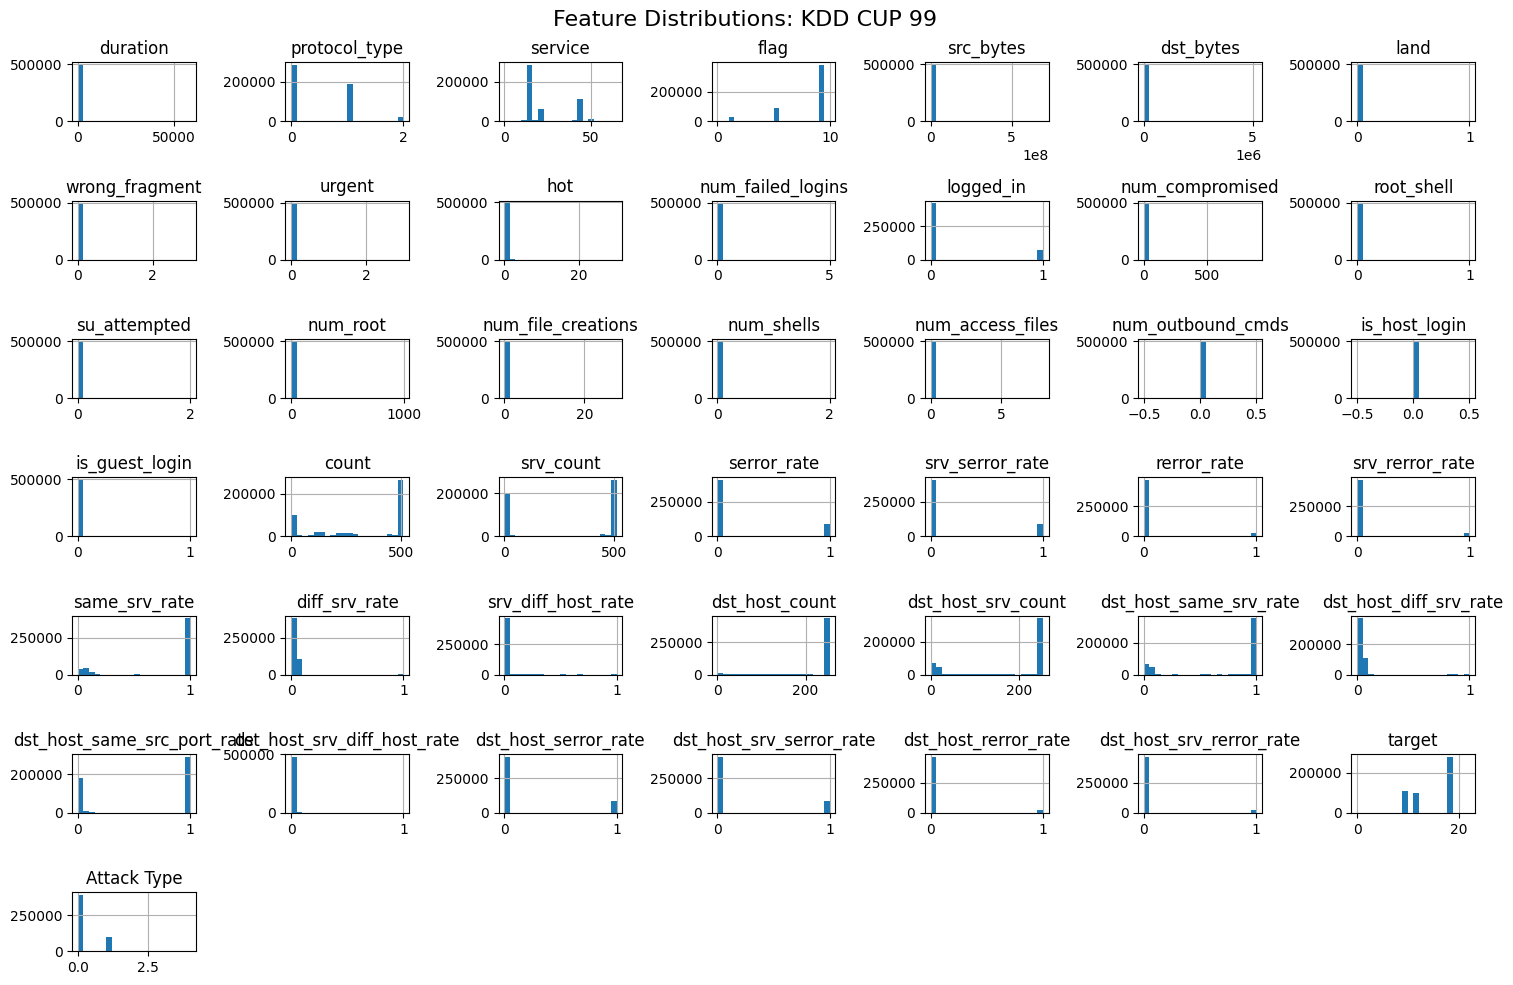

/tmp/ipykernel_3050762/306810584.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


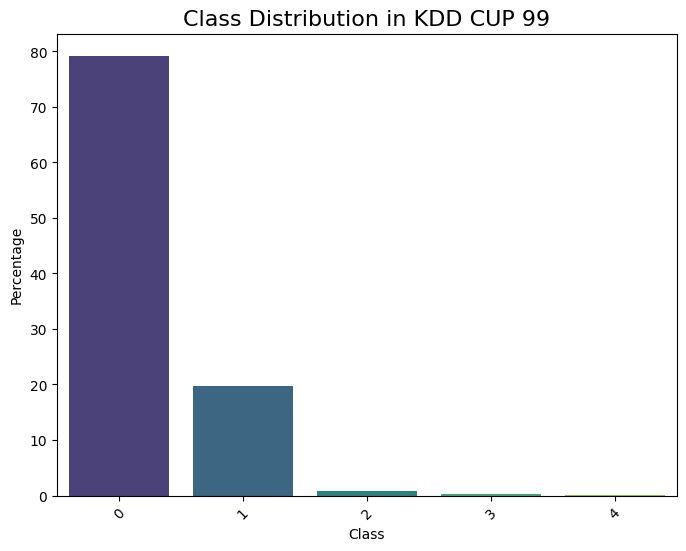

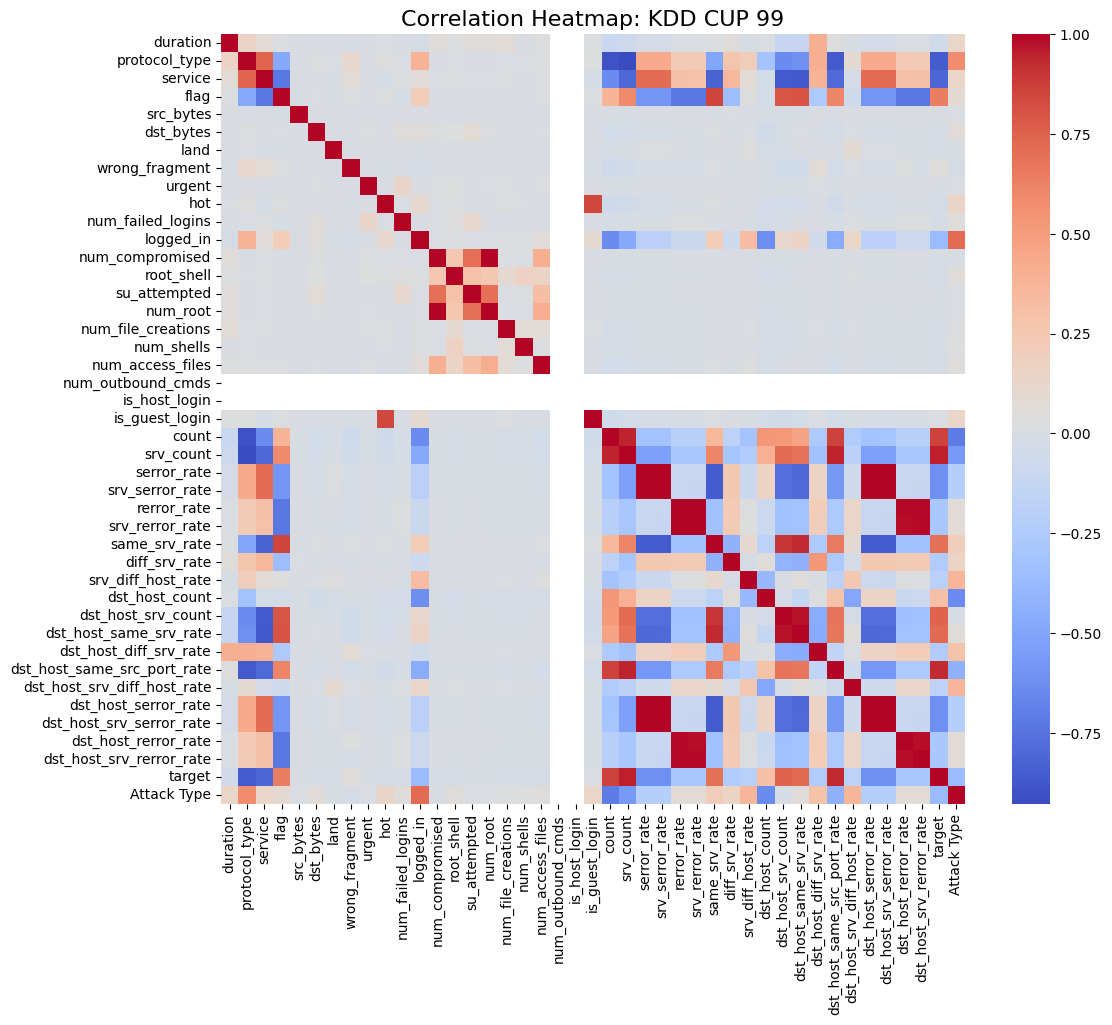

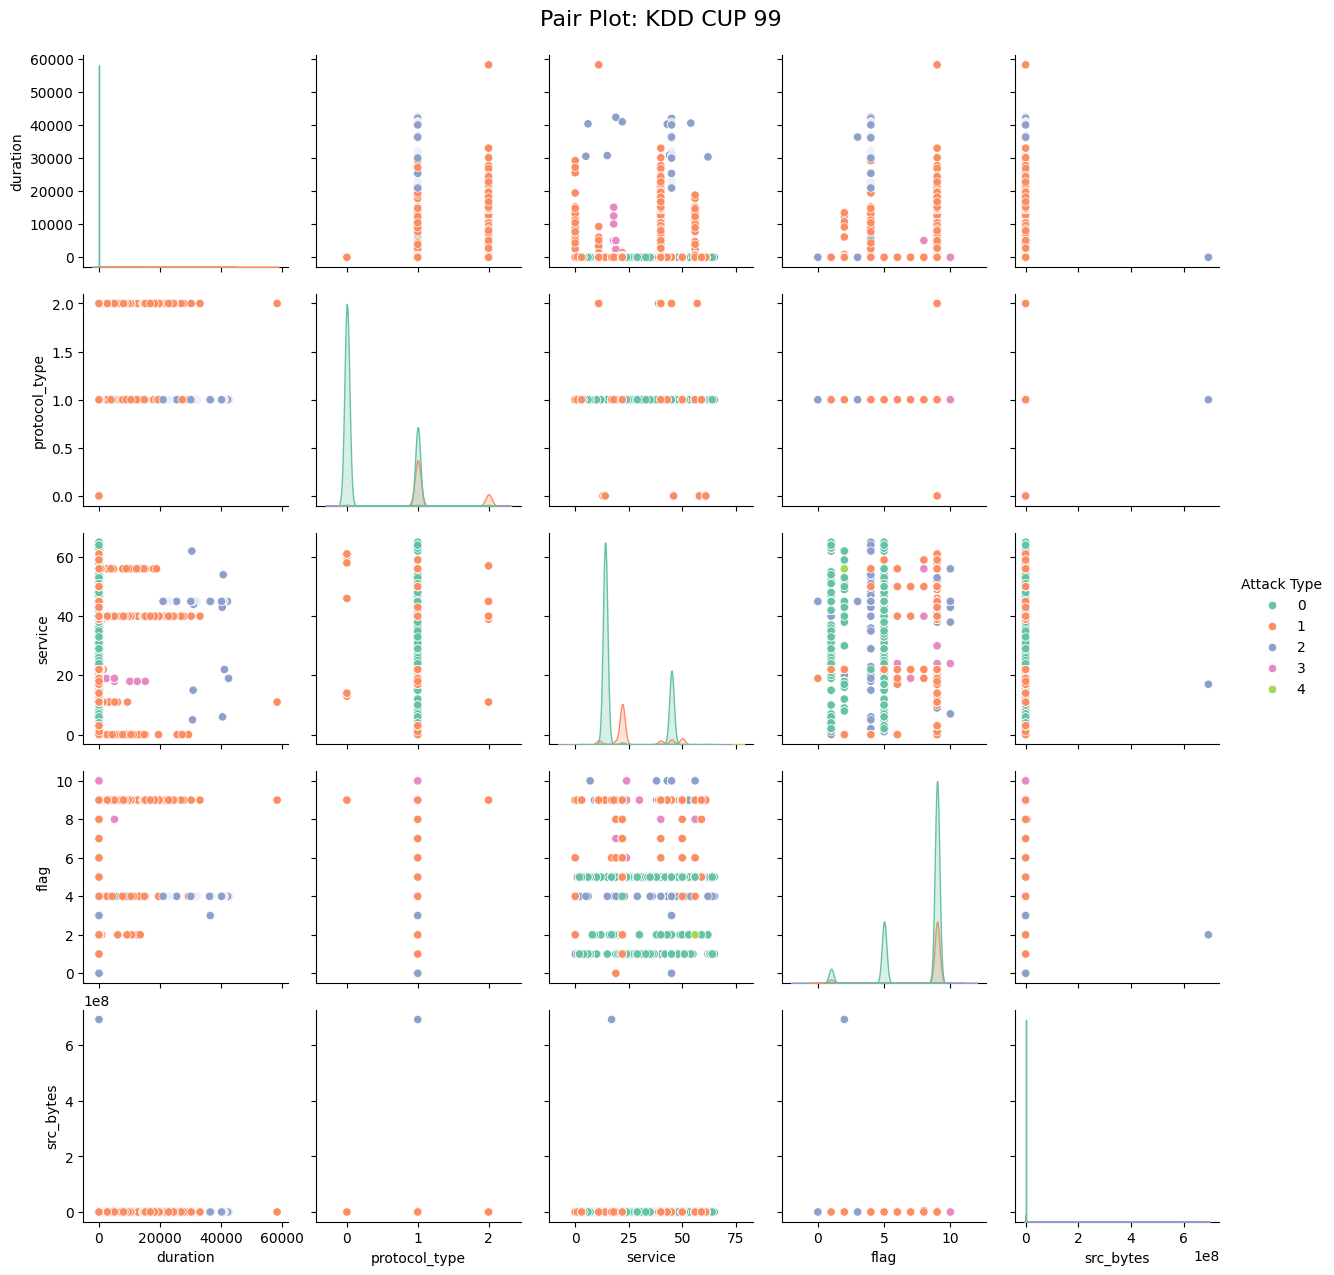


Processing dataset: UNSW-NB15
Shape of UNSW-NB15: (1087203, 203)
Number of unique classes in 'label': 2
Columns in UNSW-NB15: Index(['srcip', 'sport', 'dstip', 'dsport', 'dur', 'sbytes', 'dbytes', 'sttl',
       'dttl', 'sload',
       ...
       'state_INT', 'state_MAS', 'state_PAR', 'state_REQ', 'state_RST',
       'state_TST', 'state_TXD', 'state_URH', 'state_URN', 'state_no'],
      dtype='object', length=203)
Target column: label


/tmp/ipykernel_3050762/306810584.py:20: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1500x800 with 0 Axes>

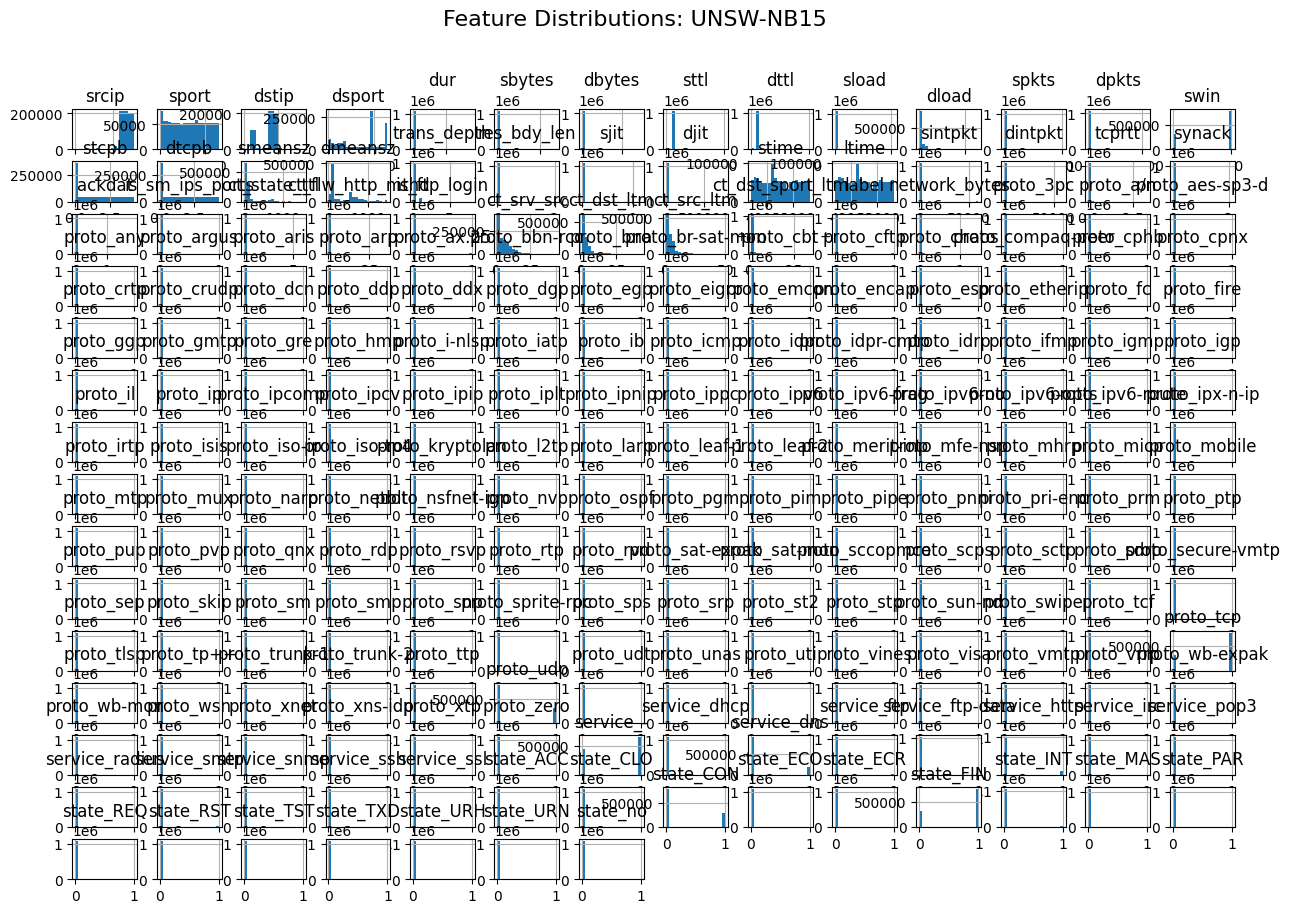

/tmp/ipykernel_3050762/306810584.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


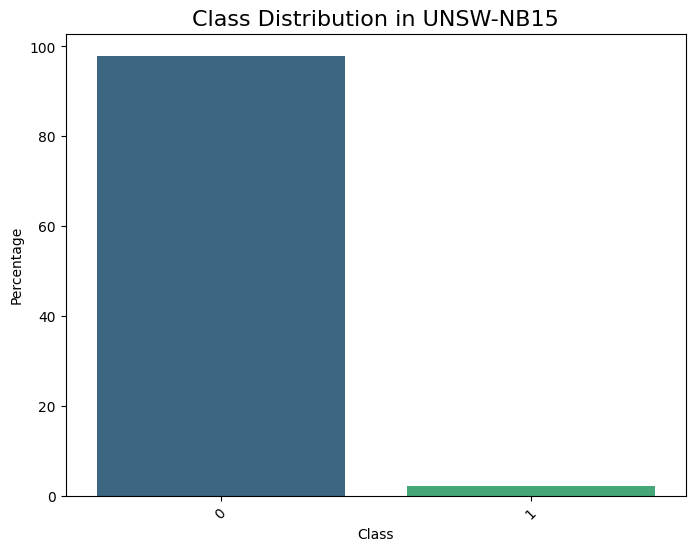

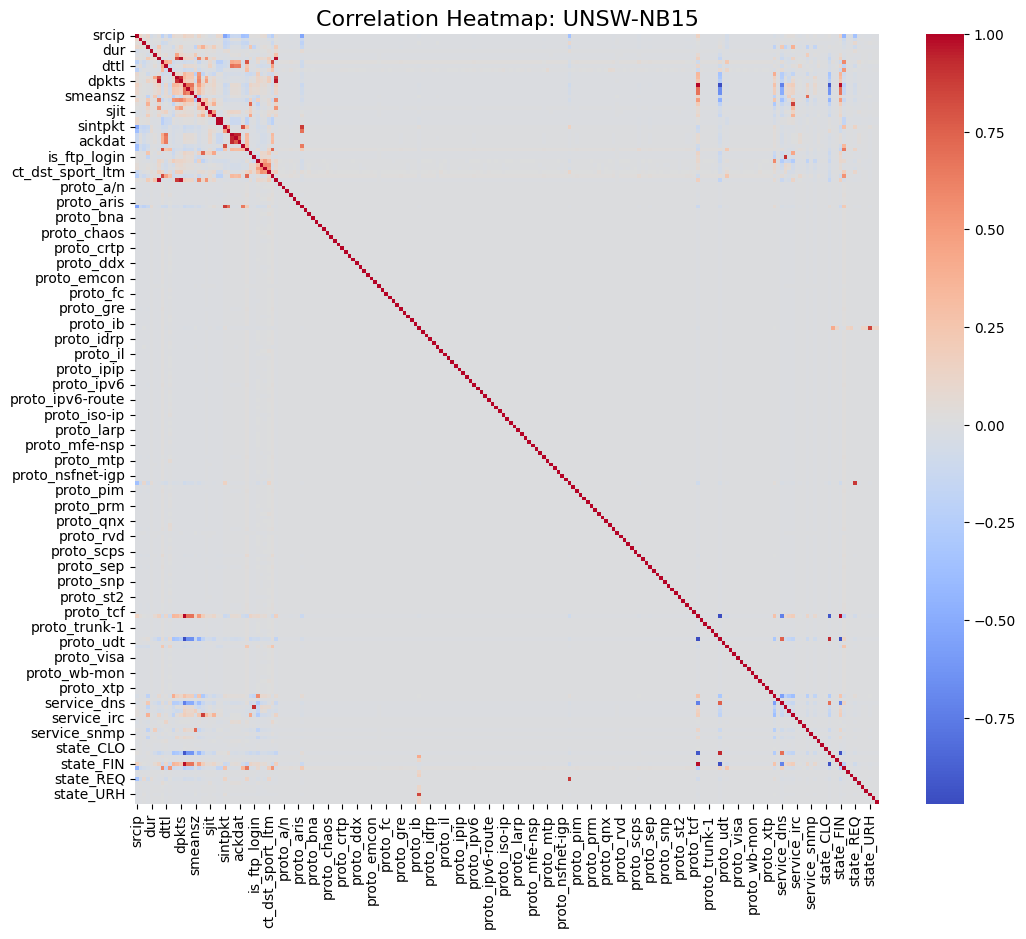

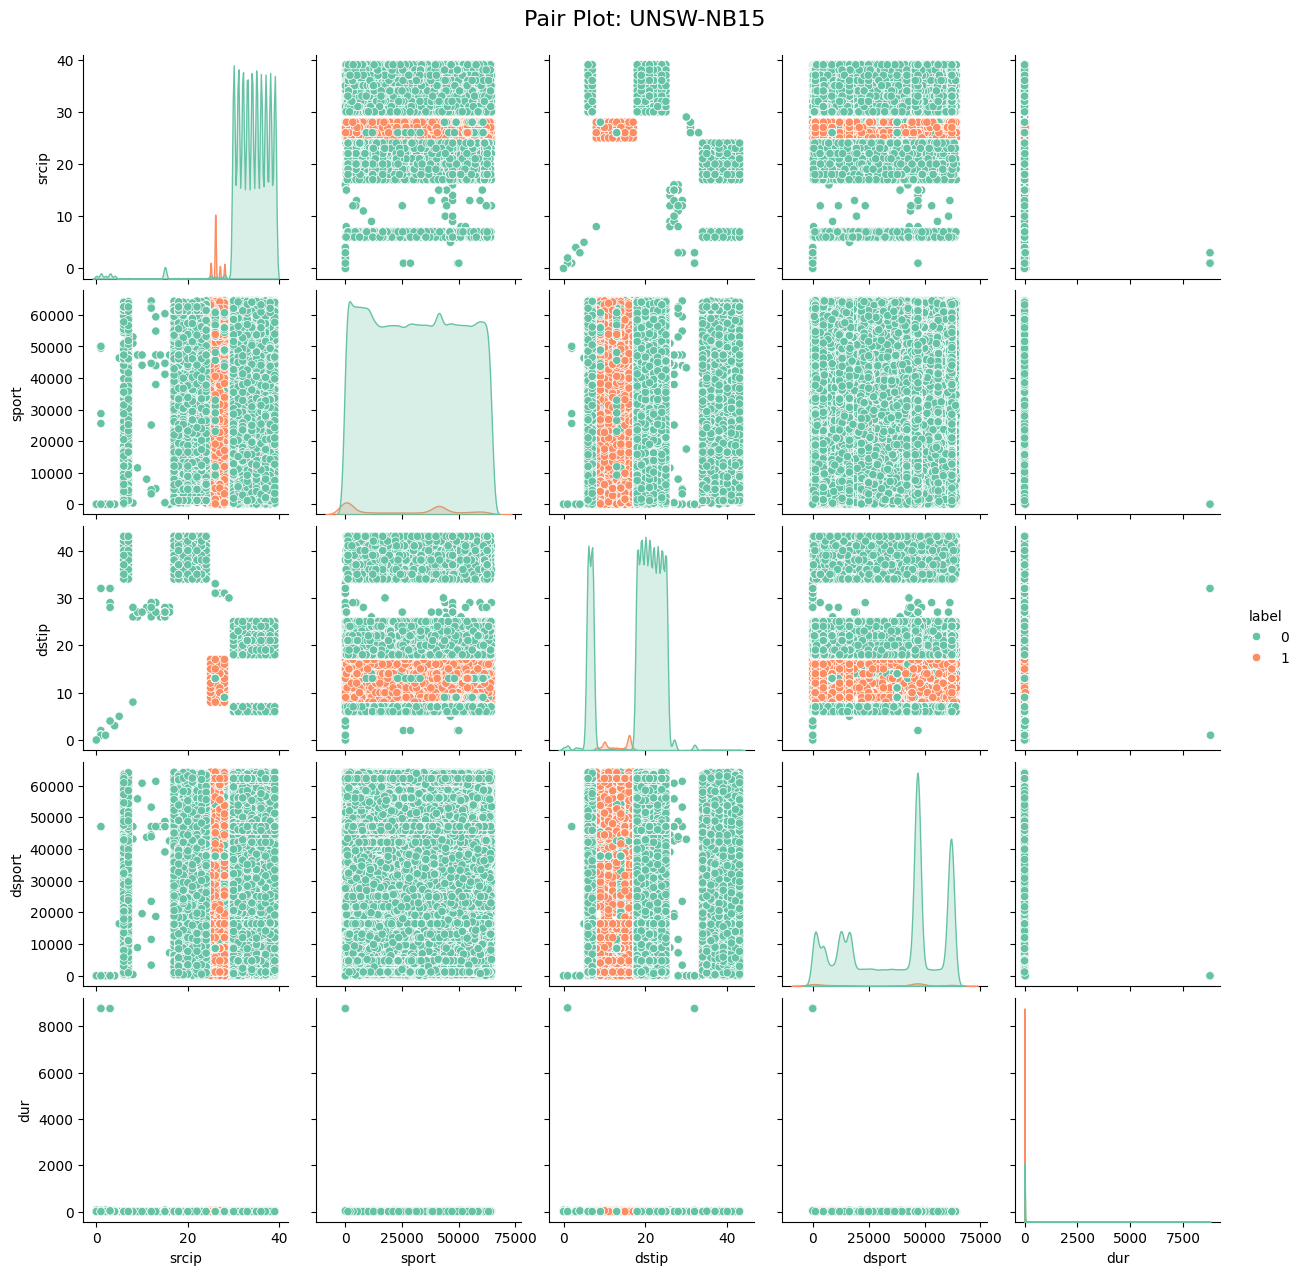


Processing dataset: CICIDS2017
Shape of CICIDS2017: (691406, 79)
Number of unique classes in ' Label': 6
Columns in CICIDS2017: Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
  

<Figure size 1500x800 with 0 Axes>

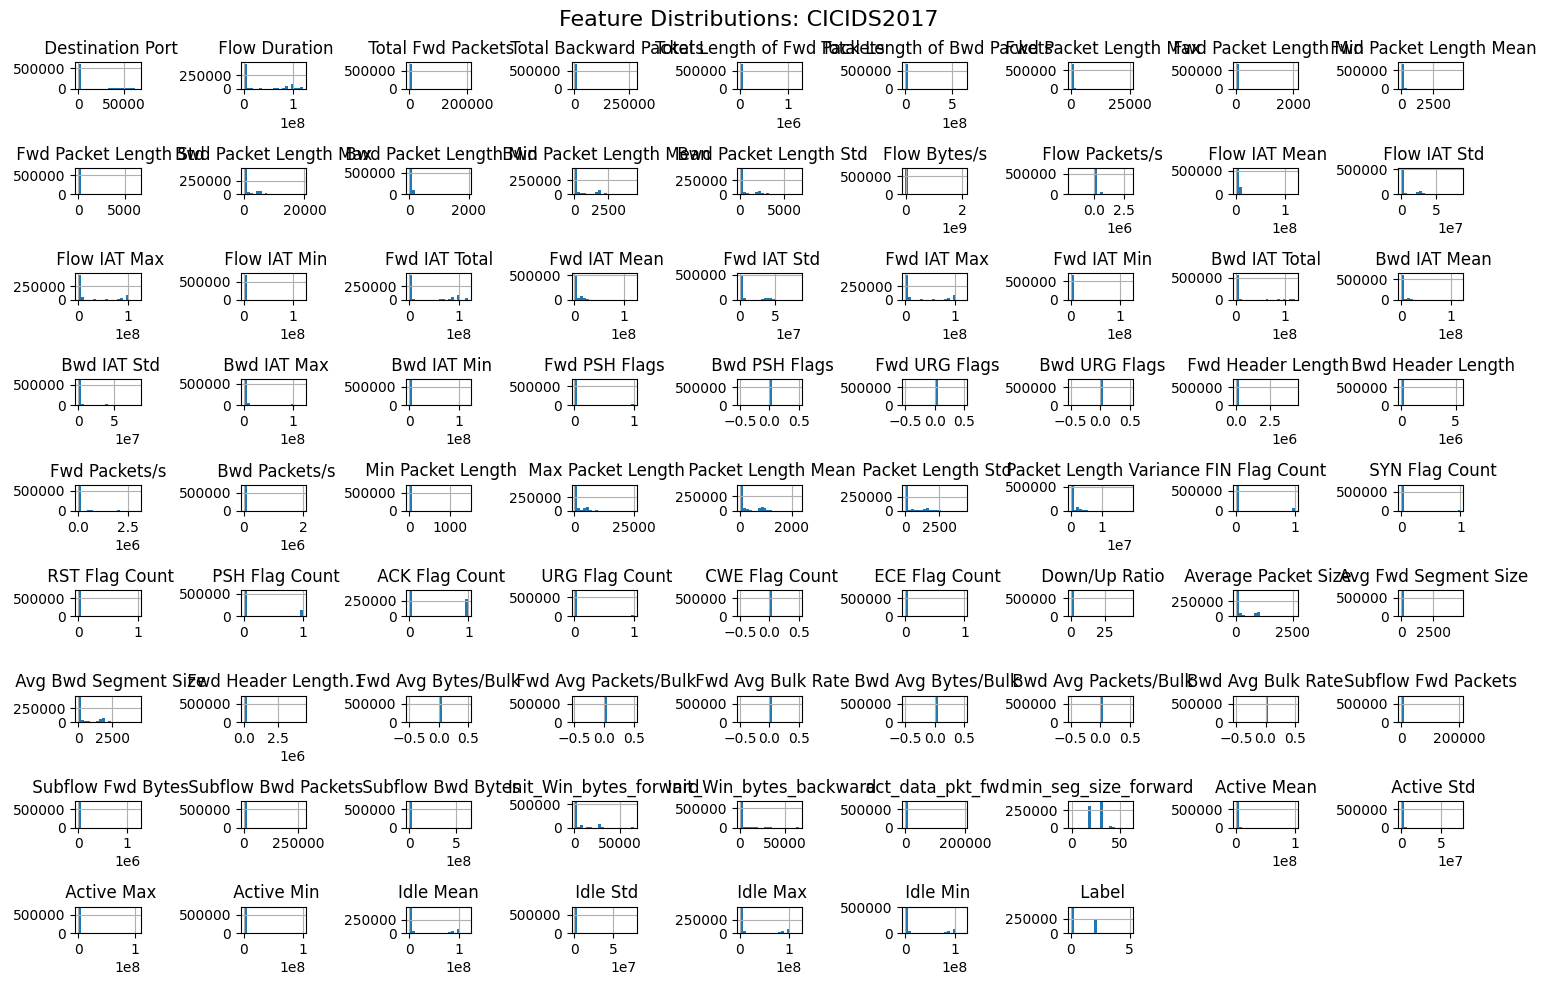

/tmp/ipykernel_3050762/306810584.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


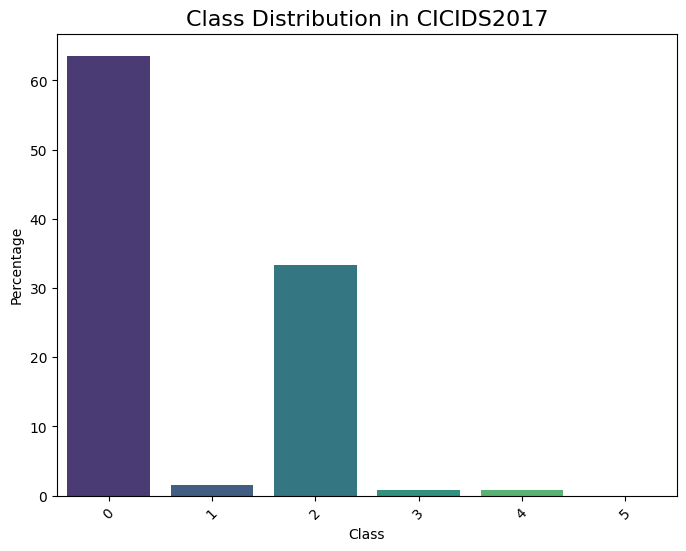

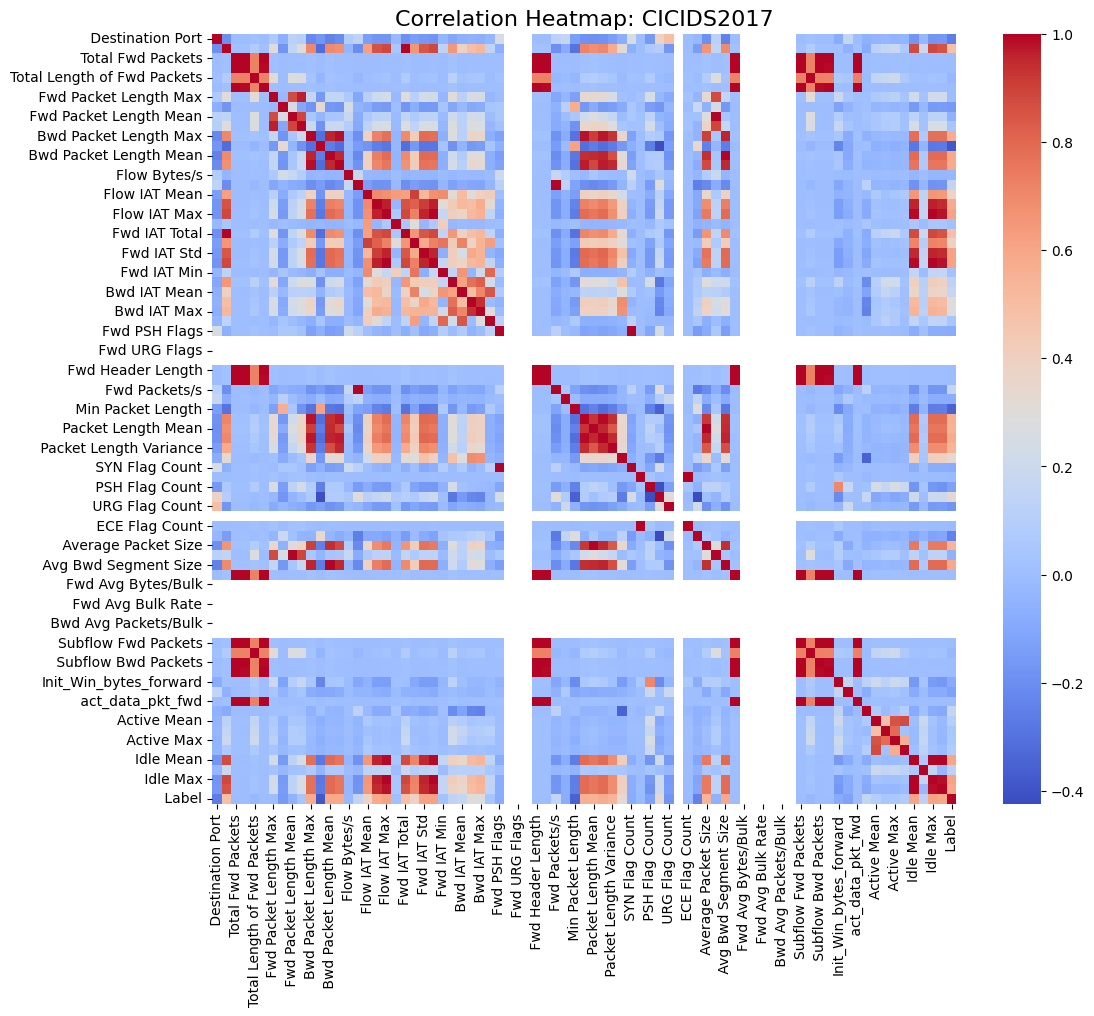

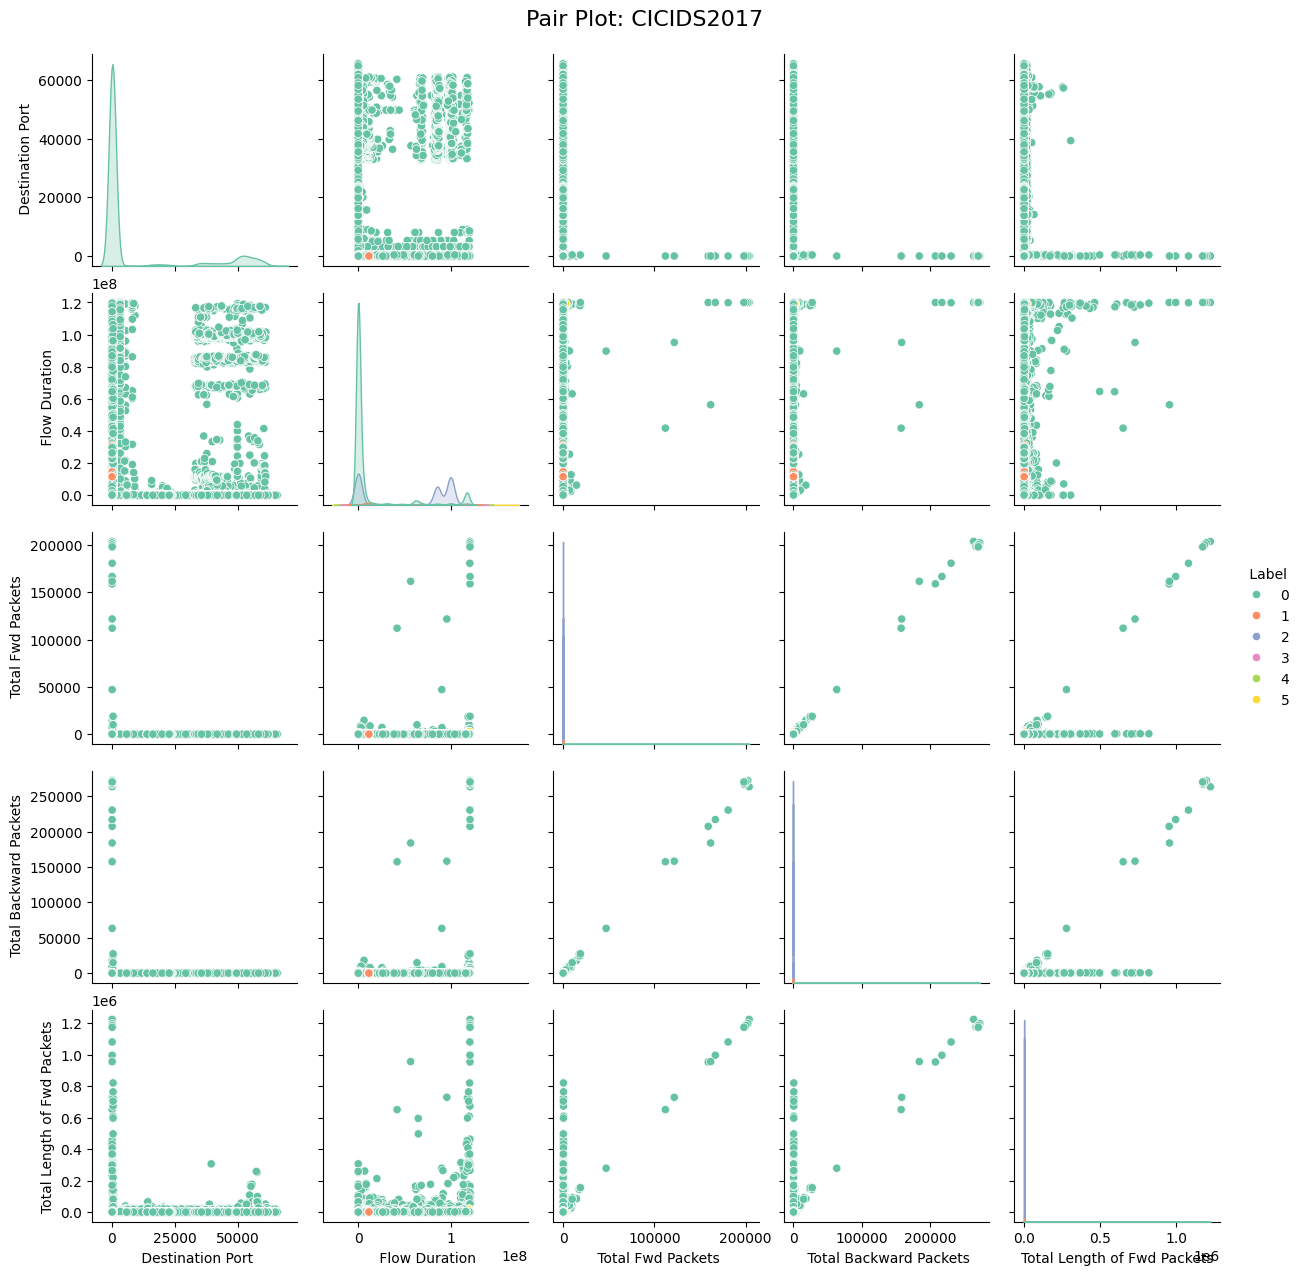


Processing dataset: NSL-KDD
Shape of NSL-KDD: (148517, 42)
Number of unique classes in 'attack': 3
Columns in NSL-KDD: Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack'],
      dtype='object')
Target column: attack


<Figure size 1500x800 with 0 Axes>

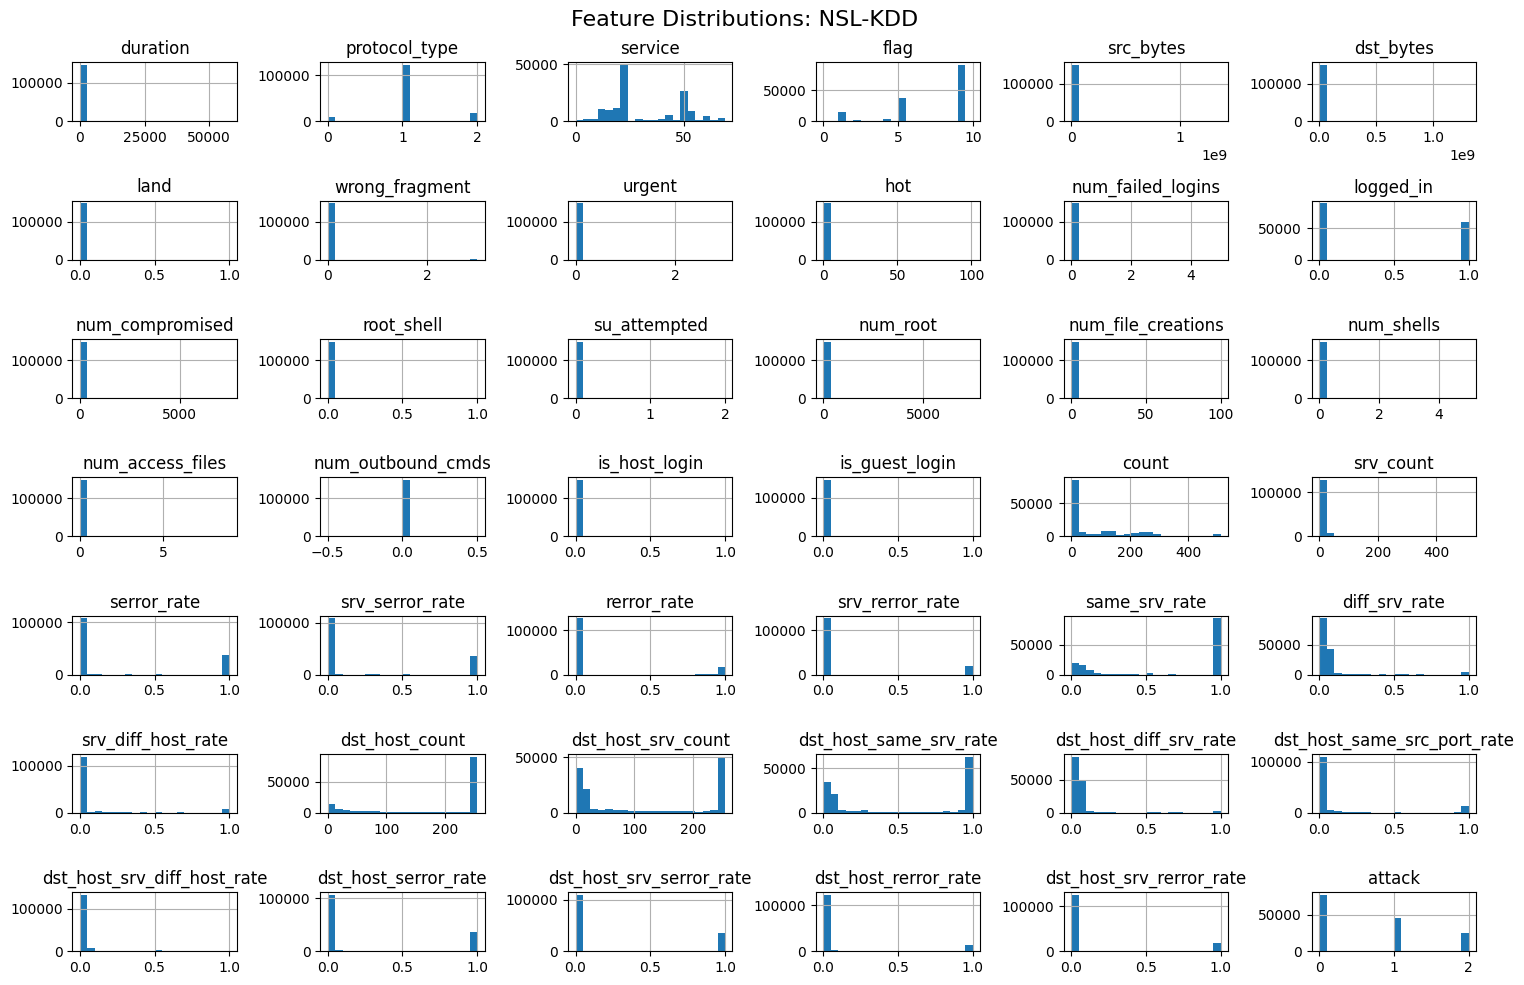

/tmp/ipykernel_3050762/306810584.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


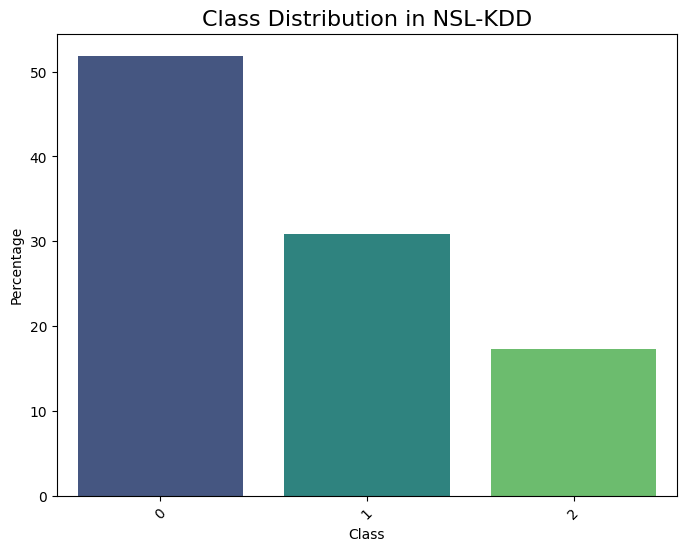

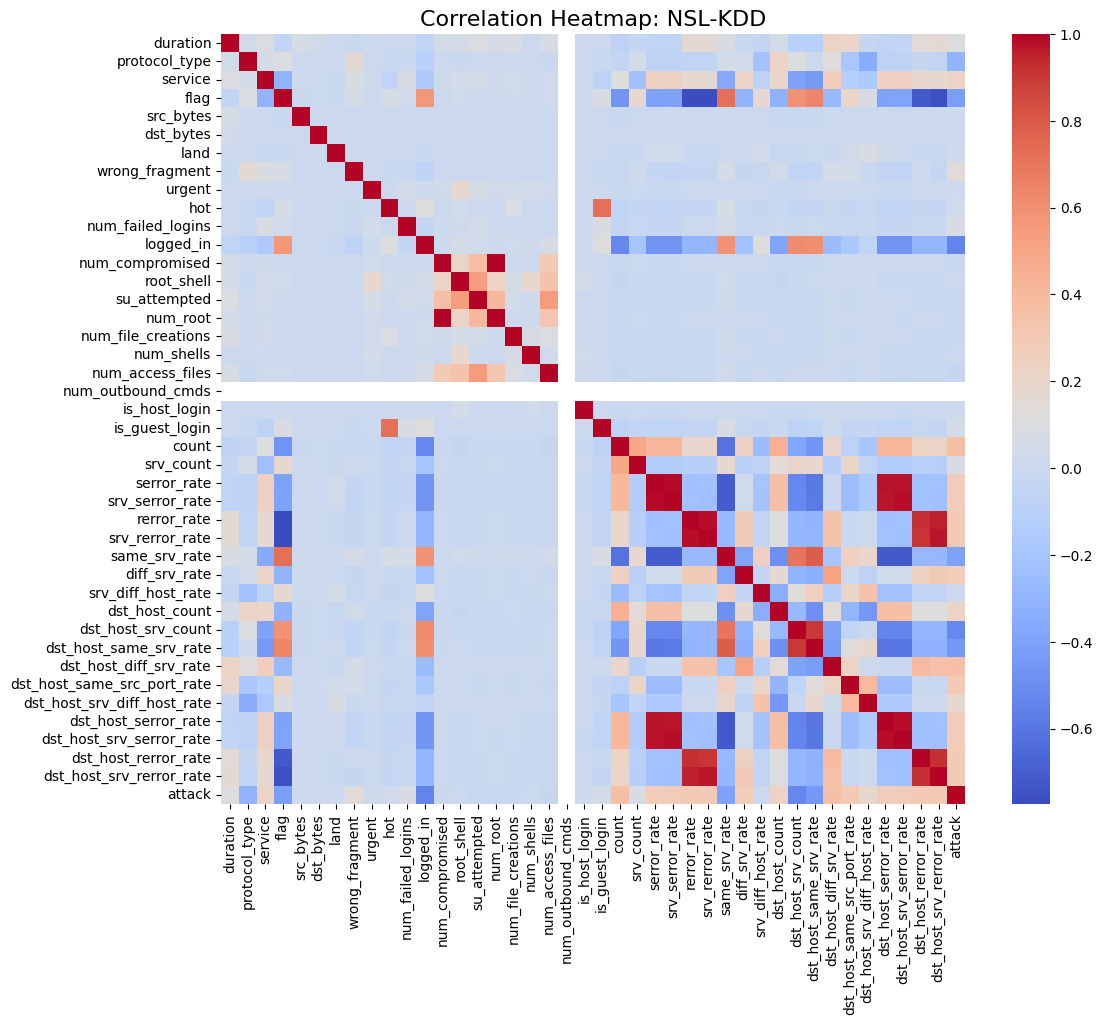

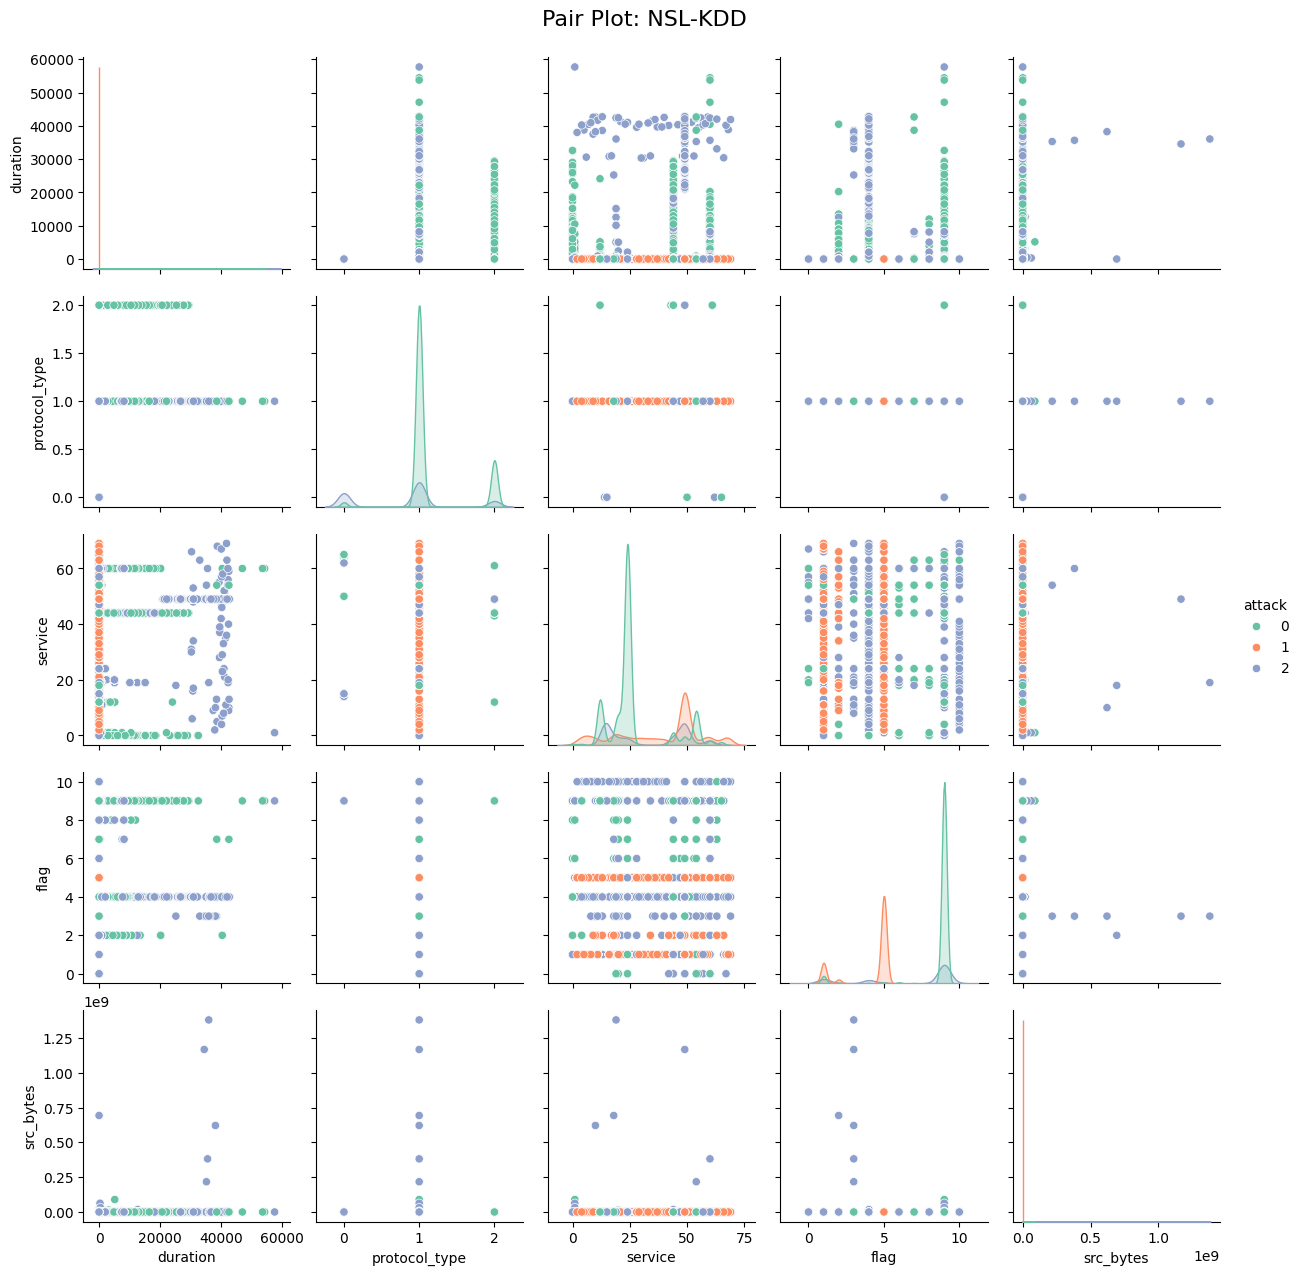

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_dataset(df, dataset_name, target_col):
    """
    Generates insightful figures for EDA.
    """
    # Check if target_col is in the DataFrame
    if target_col not in df.columns:
        raise KeyError(f"Target column '{target_col}' not found in the dataset '{dataset_name}'.")

    print(f"Columns in {dataset_name}: {df.columns}")
    print(f"Target column: {target_col}")

    # Plot distribution of numeric features
    numeric_cols = df.select_dtypes(include=["number"]).columns
    plt.figure(figsize=(15, 8))
    df[numeric_cols].hist(bins=20, figsize=(15, 10))
    plt.suptitle(f"Feature Distributions: {dataset_name}", fontsize=16)
    plt.tight_layout()
    plt.savefig(f"{dataset_name}_feature_distributions.png")
    plt.show()

    # Class distribution
    plt.figure(figsize=(8, 6))
    class_counts = df[target_col].value_counts(normalize=True) * 100  # Convert to percentage
    sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
    plt.title(f"Class Distribution in {dataset_name}", fontsize=16)
    plt.xlabel("Class")
    plt.ylabel("Percentage")
    plt.xticks(rotation=45)
    plt.savefig(f"{dataset_name}_class_distribution.png")
    plt.show()

    # Correlation heatmap
    plt.figure(figsize=(12, 10))
    correlation_matrix = df[numeric_cols].corr()
    sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", cbar=True)
    plt.title(f"Correlation Heatmap: {dataset_name}", fontsize=16)
    plt.savefig(f"{dataset_name}_correlation_heatmap.png")
    plt.show()

    # Pair plot for a subset of features
    sampled_features = [col for col in numeric_cols if col in df.columns][:5]  # Limit to 5 features
    if target_col not in df.columns:
        raise KeyError(f"Target column '{target_col}' not found in {dataset_name}.")
    sampled_df = df[sampled_features + [target_col]]
    sns.pairplot(sampled_df, hue=target_col, palette="Set2", diag_kind="kde")
    plt.suptitle(f"Pair Plot: {dataset_name}", y=1.02, fontsize=16)
    plt.savefig(f"{dataset_name}_pairplot.png")
    plt.show()


# Process datasets and visualize
for dataset_name, path in datasets.items():
    print(f"\nProcessing dataset: {dataset_name}")
    target_col = target_columns[dataset_name]

    # Preprocess dataset
    df = preprocess_data(path)
    print(f"Shape of {dataset_name}: {df.shape}")
    print(f"Number of unique classes in '{target_col}': {len(df[target_col].unique())}")

    # Visualize dataset
    visualize_dataset(df, dataset_name, target_col)
